# IONOSPHERE DATASET (MAIN)


*Reading the file "ionosphere.names" for additional insight of the dataset is recommended. In particular, note that there are no faulty readings in the dataset. All numbers are to be taken literally.*

We're importing the ionosphere data first. Note that the file is named "ionosphere.data" now placed in my google drive, and it is an edited version of the original file (namely, an additional row has been added to the file's top to give row legend data.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import io
df = pd.read_csv("/content/drive/My Drive/COMP551-W2020-Datasets/project1/ionosphere.data",header=None)
classifcationIndex = (len(df.keys())-1)
ionosphereClassifications = df[classifcationIndex].to_numpy()
ionosphereFeatures        = df.drop([classifcationIndex],axis=1).to_numpy()

In [0]:
import numpy as np

#==============================================================================================================
#
#   Vector Normalizer
#
#     Takes an input vector of numbers and normalizes its values between 0 and 1.
#
#==============================================================================================================
def normalize_vector(vector):
  #Obtain Normalization Values
  min_value = vector[0]
  max_value = vector[0]
  for i in range(len(vector)):
    if vector[i] < min_value:
      min_value = vector[i]
    elif vector[i] > max_value:
      max_value = vector[i]
  #Normalize all vector elements
  for i in range(len(vector)):
    vector[i] = ( vector[i] - min_value )/(max_value-min_value)
  return vector

In [0]:
#Takes a one-dimensional matrix and replaces elements of "g" with 1 and elements of "b" with 0.
  def binarizeGBClasses(matrix):
    for i in range(len(matrix)):
      if matrix[i]=="g":
        matrix[i] = 1
      elif matrix[i]=="b":
        matrix[i] = 0
    return matrix

ionosphereClassifications = binarizeGBClasses(ionosphereClassifications)
print(ionosphereClassifications)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [0]:
print("Normalizing features 2 and onwards.")
#Normalize all feature input columns
for column in range(2, len(ionosphereFeatures[0]) ):
  vector = []
  for instance in range(len(ionosphereFeatures)):
    vector.append( ionosphereFeatures[instance][column] )
  vector = normalize_vector(vector)
  for instance in range(len(ionosphereFeatures)):
    ionosphereFeatures[instance][column] = vector[instance]

Normalizing features 2 and onwards.


In [0]:
print(ionosphereClassifications)
print(ionosphereClassifications.shape)

In [0]:
print(ionosphereFeatures)
print(ionosphereFeatures.shape)

Now that we have imported our data, we now need to think about what we're going to do with it. In Logistic Regression, we are attempting to build a hyperplane boundary in our data and create a classifier that way. In Naive Bayes, however, we're just compiling all of the data and building a set of probabilities that will be used with new data later.

With that in mind, is there really much use in visualize data? Perhaps not necessarily in having the data classified it does not; however it may help to have some human intelligence attempt to give insight with regards to how datapoints clump together anyways.

We will visualize in two sets of graphs: The first set of graphs will be thirty four graphs of each of the thirty four features mapped to the output classifications; the Second set of graphs will be something like 595 graph permutations mapping one feature to another with colours representing their binary classification. This is as far as is convenient in terms of visualizing data without creating more complicated algorithms for how to represent data.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
plt.close('all')

## Observations of Ionosphere Dataset

**Below is the feature-to-feature set of graphs.**

In [0]:
fig_f2f = plt.figure()
fig_f2f.set_figheight(34*5)
fig_f2f.set_figwidth(34*5)
for frow in range(34):
  for fcol in range(34):
    if fcol <= frow:
      continue
    subplot = fig_f2f.add_subplot(34,34,frow*34+fcol+1)
    x = (ionosphereFeatures.T)[fcol]
    y = (ionosphereFeatures.T)[frow]
    good_x = []
    good_y = []
    bad_x = []
    bad_y = []
    for i in range( x.size ):
      if( (ionosphereClassifications[i] is "g") or (ionosphereClassifications[i]==1) ):
        good_x.append( x[i] )
        good_y.append( y[i] )
      else:
        bad_x.append( x[i] )
        bad_y.append( y[i] )

    subplot.scatter( x=good_x, y=good_y, c="green" )
    subplot.scatter( x=bad_x, y=bad_y, c="red" )
    subplot.set_title("Feature " + str(frow) + " over " + str(fcol) + " graph")
    subplot.grid(True)
fig_f2f.show()


**Below is the set of graphs of feature-to-class.**

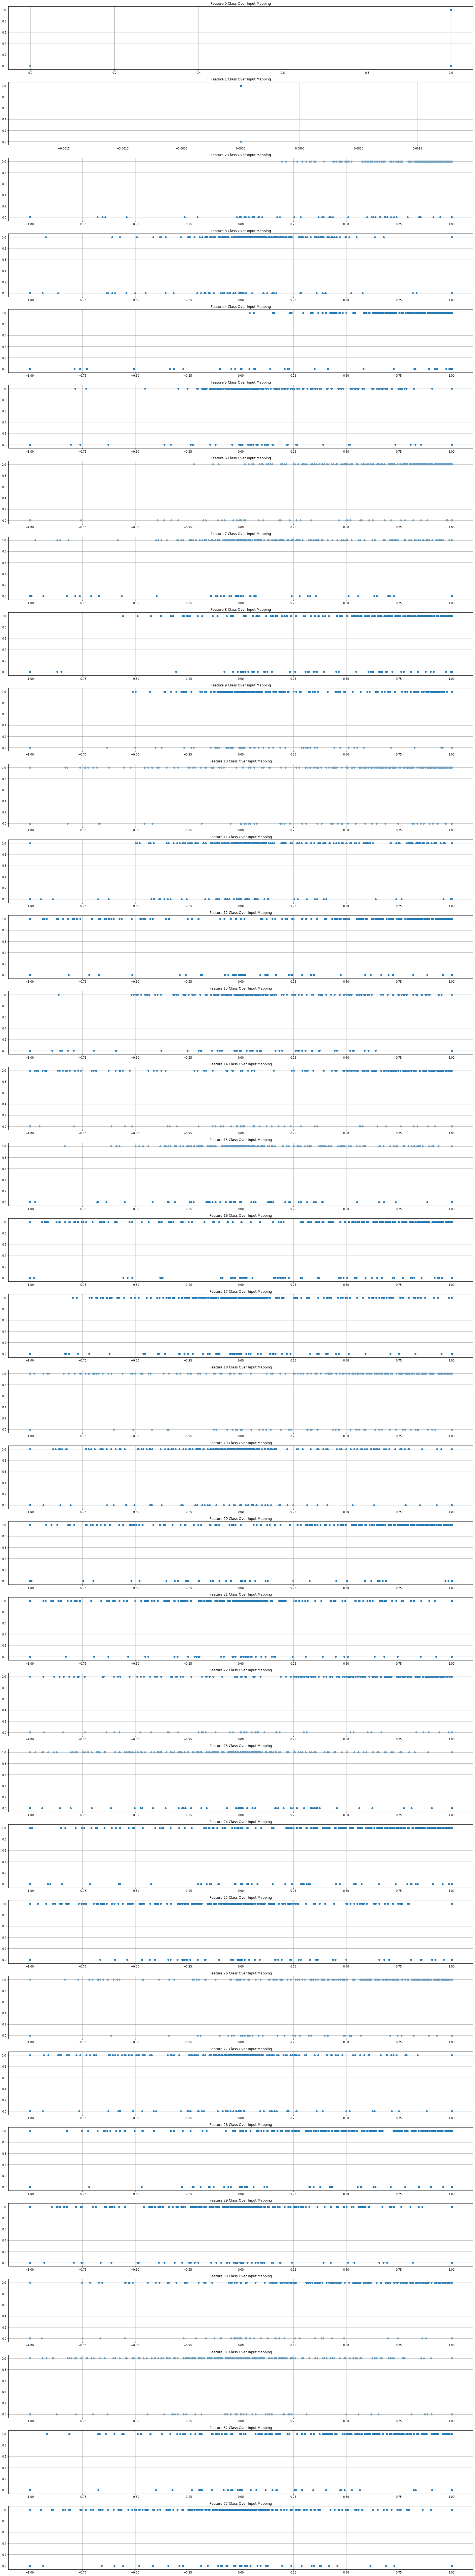

In [0]:
fig_f2c = plt.figure()
fig_f2c.set_figheight(34*5)
fig_f2c.set_figwidth(6*5)
for feature in range( 34 ):
  f2c_subplot = fig_f2c.add_subplot(34,1, feature+1)
  f2c_subplot_x = []
  f2c_subplot_y = []
  for e in range( ionosphereClassifications.size ):
    f2c_subplot_x.append( ionosphereFeatures[e][feature] )
    if( ionosphereClassifications[e] is "g" ):
      f2c_subplot_y.append(1)
    else:
      f2c_subplot_y.append(0)
  f2c_subplot.scatter(x=f2c_subplot_x,y=f2c_subplot_y)
  f2c_subplot.set_title("Feature " + str(feature) + " Class Over Input Mapping")
  f2c_subplot.grid(True)
fig_f2c.show()

Observation 1: The charts with feature pairs graphed on an x and y axes and encoded in green and red to indicate class reveal that most of the "bad" classes of data are sort of randomly distributed across the full set of values. Looking at any of the rows of charts after the first two rows, we find that our green values tend to be clumped together, sometimes by area and sometimes even in a line. Of course, not all of them behave this way; and further note that most of these values aren't exactly something we could put a line through and apply an inequality to.

Observation 2: The charts of class vs feature values show that most of our features are not logistically regressible. However, many seem to have greater good values in higher values, so not all is impossible.

Observation 3: Feature 2's instances are all 0; in other words, it's as good as removed since it will have 0 affects on the predictions. With that in mind, I am curious as to what weights the algorithm would yield for this input feature. It's possible that the algorithm will not touch it as the gradient of this feature would always be 0; however, if the gradient of this feature is ever nonzero, then we could get any real number in here and it wouldn't change the predictive ability of the model.

Observation 4: Not really an observation, but it would be interesting to make a decision tree based off of this, where each node has a fanout of two based on whether or not a feature considered by the node is above or below. Of course, this would cease to be logistic regression; but it is food for thought.

Now before I proceed, I would like to obtain some basic useful contextual characteristics of the dataset I am working with - namely, things like how much of the data set is classified as good versus bad. This would be particularly useful in giving me a lower bound for what a random results-returning system should yield (ie, if I randomly gave you a class of the data based on how much good and bad there is in the data, what is the probability I return good). This is a useful baseline.

The number of data entries is : 351
The number of good data entries is : 225
The number of bad data entries is 126: 
The probability of randomly getting a good output based is : 64.1
The probability of randomly getting a bad output based is : 35.9


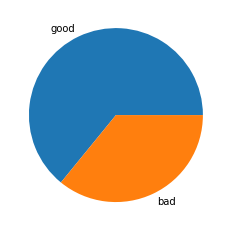

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data_statistics = { "total_entries":( ionosphereClassifications.size ) }
data_statistics["number_of_good_entries"] = 0
data_statistics["number_of_bad_entries"] = 0
for i in range(ionosphereClassifications.size):
  if( ionosphereClassifications[i] == "g" ):
    data_statistics["number_of_good_entries"] = data_statistics["number_of_good_entries"] + 1
  else:
    data_statistics["number_of_bad_entries"] = data_statistics["number_of_bad_entries"] + 1
data_statistics["ratio_of_good_to_all_entries"] = data_statistics["number_of_good_entries"]/data_statistics["total_entries"]
data_statistics["ratio_of_bad_to_all_entries"] = data_statistics["number_of_bad_entries"]/data_statistics["total_entries"]

print("The number of data entries is : %i" %data_statistics["total_entries"])
print("The number of good data entries is : %i" %data_statistics["number_of_good_entries"] )
print("The number of bad data entries is %i: " %data_statistics["number_of_bad_entries"] )
print("The probability of randomly getting a good output based is : %3.1f" %(data_statistics["ratio_of_good_to_all_entries"]*100) )
print("The probability of randomly getting a bad output based is : %3.1f" %(data_statistics["ratio_of_bad_to_all_entries"]*100) )
plt.close("all")
plt.pie( [ data_statistics["ratio_of_good_to_all_entries"], data_statistics["ratio_of_bad_to_all_entries"] ], labels=["good","bad"] )
plt.show()

The script above illustrates that the majority of data entries are classified as "good". Particularly, 225 out of 351 or approximately 64.1% of entries are good. How is this useful? Well it means that a 64.1% accuracy by an algorithm which just gives all data a "good" class would be the lower bound. Ie, getting 64.1% accuracy is as good as random in this dataset, so I'll definitely have to aim for higher.

## Logistic Regression Model Implementation and Tests with Ionosphere Dataset

**The following is my Logistic Regression Model implementation.**

In [0]:
import numpy as np

#============================================================================================================================================================================================================================================================================
#
# IONOSPHERE LOGISTIC REGRESSION MODEL CLASS
#
#   @author Edwin Pan of Group 101 of COMP551 Winter 2020
#
#============================================================================================================================================================================================================================================================================

class LogisticRegressionModel:

  #Constructor and Instance Variables
  def __init__(self, data_dimensions):
    self.w = np.ones(data_dimensions+1)  #Dimension of weights is the dimensions of the data plus 1 due to bias
    return
  
  #helper logistic Function
  #Takes in a single input that should be a single weight times a single parametre and returns the logistic function's output of these inputs
  #DOES NOT TAKE MULTIDIMENSIONAL INPUTS!
  def __logisticFunc__(self,wx):
    return 1/(1+np.exp(-wx))

  #helper addOnesForBasis Function
  #Appends to the left of the matrix a column of ones. This is useful for accounting for the basis constant in weights.
  def __addOnesForBasis__(self,matrix):
    dime = (len(matrix.shape))
    if( dime==1 ):  #If it's dimension 1, I assume it's an input array of X in which case it's a row with 34 columns.
      newMatrix = np.ones( (len(matrix)+1) )
      for i in range(len(matrix)):
        newMatrix[i+1] = matrix[i]
      return newMatrix
    else:
      rows = len(matrix)
      cols = len(matrix[0])
      newMatrix = np.ones( (rows,cols+1) )
      newMatrix[:,1:] = matrix                        #https://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-a-numpy-array
      return newMatrix

  #helpler binarizeGBClasses function
  #Takes a one-dimensional matrix and replaces elements of "g" with 1 and elements of "b" with 0.
  def __binarizeGBClasses__(self,matrix):
    for i in range(len(matrix)):
      if matrix[i]=="g":
        matrix[i] = 1
      elif matrix[i]=="b":
        matrix[i] = 0
    return matrix

  #setWeights function
  #Sets the weights of the current model instance to the weights provided
  def setWeights(self,newWeights):
    if len(newWeights) != len(self.w):
      print("Could not set new weights; incorrect dimensionality: Detected new weights of size %i when attempting to replace weights of size %i" %(len(newWeights),len(self.w)) )
      return
    self.w = newWeights
    return

  #getWeights function
  #Returns the weights that have been trained in the function
  def getWeights(self):
    return self.w

  #cost function
  #@Takes X Training Data in form of NxD matrix and Y True Training Data Classification in form of Dx1 matrix
  #@Returns the Cost of the current model
  def cost(self,X,Y):
    y = self.__binarizeGBClasses__(Y)  #First, clean up Y in case it's not already been normalized to 0's and 1's.
    x = self.__addOnesForBasis__(X)    #Turn X, the NxD matrix, into x, its equivalent Nx(D+1) matrix in order to account for bias. This means the new column will at the start and a vector of ones.
    z = np.dot(x,self.w)          #Obtain readied inputs. Based on Lecture PDF 4 Slide 20
    #Calculate the cost
    j = 0
    for i in range(z.size):
      j += y[i]*np.log1p( np.exp(-z[i]) ) + (1-y[i])*np.log1p( np.exp(z[i]) )
    #Return the cost
    return j/z.size

  #helper gradient function
  #@Takes in Training Data's Features and Training Data's Classification and
  #@Returns Derivatives of each Weight in a vector, also known as the Gradient
  def __gradient__(self, X, Y):
    #Note to self:
    # X is an Nx(D+1) Matrix where there are N rows of N instances and D+1 Columns of D+1 features
    # Y is an Nx1 Matrix where there are N rows of true classifications
    #Objective to self:
    # The gradient here is basically the direction each element of a vector need to proceed towards in order to reach something. In this case, it's the minimum cost.
    # In other words, the deltaW or gradient of the Cost Function as a function of W is a vector of the differences between y real and y predicted multiplied by what x was at the time of these particular y's summed for all pairs of y_real, y_predicted, and x.
    # I assume this to be the case because it looks very similar to the one-dimensional version of this on Lecture 40 Slides 23 and the code in the tutorial here https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc which is
    #   on a two-dimensional weight system (weight and bias) where, most interestingly, each feature is separate from the other feature. The final part makes sense when considering how the maching learning algorithms we have been taught thus far all assume
    #   that the input features are mutually exclusive in their meaning. Mind you, I don't really think that's the case here; but anyways.
    dw = np.zeros(self.w.size)
    N = Y.size        #Number of Instances
    D = self.w.size   #Number of Dimensions: note w is already D+1; so D = D_original + 1 to take into account the bias constant in weights
    for i in range(N):    #FOR each instance
      x = np.ones((1,D-1))    #Get the input features per instance for predicting
      for j in range(1,D):    #Omit the bias one to avoid errors        
        x[0][j-1] = X[i][j]   #Build the input data point for predicting
      dY = Y[i] - self.predict(x)    #Calculate how much movement is needed to go from predicted to real Y values
      for f in range(D):    #FOR each feature
        dw[f] += X[i][f]*dY        #Sum this movement needed, ie necessary change number, into the gradient
    #Return the gradient, ie velocity towards the real Y values
    return dw

  #Fit function
  #@Takes DataFrame of training data, Double of learningRate, and Integer of gradientDescentIteration; and optional argument for whether or not to track accuracy over each gradient descent.
  #There is no automatic termination feature as the use of an arbitrary threshold of change in cost over iteration would either be undersensitive or lead to infinite fitting processes in the case of learningRates that are too high.
  #Currently, the learningRate is a constant value. However it could be interesting to decrease the learning rate over gradient descent iterations.
  #@Returns nothing
  #Fits the model
  def fit(self, trainingDataFeatures, trainingDataClasses, learningRate, gradientDescentIterations, trackAccuracyOverIterations=False, doGraphing=True, beVerbose=True):
    #Reset the weights of the model
    self.setWeights( np.ones( self.w.size ) )
    #Start tracking history of values
    history = {"weights":     [ self.w ],
               "cost":        [ self.cost(trainingDataFeatures,trainingDataClasses) ],
               "accuracy":    [ self.evaluate_acc(trainingDataFeatures,trainingDataClasses) ],
               "iterationNo": [0]
               }  #History Tracker
    X = self.__addOnesForBasis__(trainingDataFeatures)       #Insert column of ones to the left of training data for bias.
    for i in range(1,gradientDescentIterations+1):
      #As of 20200202 15:04 Gradient Descent has yet to be discussed. So, ati this moment in time, I am referring to https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
      #Diagnostic Output
      if beVerbose:
        if(i%10 == 0):
          diagnosticStr = "Executing gradient descent iteration number " +str(i)+ " of " + str(gradientDescentIterations) + " with learning rate " + str(learningRate) + "."
          print(diagnosticStr)
      #Actual Gradient Descent part
      dw = self.__gradient__(X,trainingDataClasses) #get the gradient (a sort of vector toward the minimum value as it is derived from the cost function)
      for f in range(dw.size):  #for each feature, apply the corrective factor multiplied by learning rate.
        self.w[f] += learningRate*dw[f]
      #History Graphing
      if doGraphing:
        
        history["weights"].append( np.copy(self.w) )
        history["cost"].append( self.cost(trainingDataFeatures,trainingDataClasses) )
        if trackAccuracyOverIterations: #Tracking accuracy over time is extremely computationally expensive. As such, it must be verbosely activated in the argument to be active.
          history["accuracy"].append( self.evaluate_acc(trainingDataFeatures,trainingDataClasses) )
        history["iterationNo"].append(i)
    return history

  #Predict function
  #@Takes in an input Series of input datapoint
  #@Returns the classification of the input datapoint classifications
  def predict(self, x):
    #Series of length D multiplied by Weights of length D+1, summed
    x = self.__addOnesForBasis__(x)
    wx = np.dot(x,self.w.T)
    y = self.__logisticFunc__(wx)
    #Classify as 0 or 1
    if( y > 0.5 ):
      return 1
    return 0

  #evaluate_acc method.
  #@Takes in Training Data (NxD Matrix) and Classifications (Nx1 Matrix);
  #@Returns the accuracy of the current weights
  def evaluate_acc(self, X, Y):
    everythingRight = 0
    everything = 0
    for i in range( len(X) ):  #For each instance
      if( self.predict( X[i] ) == Y[i] ):  #Use the model, predict the output with obtained features, and tally the result.
        everythingRight += 1
      everything += 1                 #don't forget the total count.
    return everythingRight/everything

In [0]:
#==========================================================================================================================
#
#   YOU WILL SEE THIS METHOD USED LATER WHEN ANALYZING OUR LOGISTIC REGRESSION MODEL
#
#     Useful Method which takes the history data returned by the logistic regression model's fit method and graphs it.
#
#==========================================================================================================================
import matplotlib.pyplot as plt
def graph_history(history,accuracyWasTracked=False):
  costsOverIterationsFigure = plt.figure()
  costsOverIterationsFigure.set_figheight(9)
  costsOverIterationsFigure.set_figwidth(15)
  costsOverIterationsPlot = costsOverIterationsFigure.add_subplot(1,1,1)
  costsOverIterationsPlot.plot(history["iterationNo"],history["cost"], label=("Cost over Iterations") )
  costsOverIterationsPlot.set_xlabel("Iteration Number")
  costsOverIterationsPlot.set_ylabel("Cost")
  costsOverIterationsPlot.grid()
  costsOverIterationsFigure.show()
  #We are also required to graph Accuracy over Iteration Number, so I'm going to add this as a third graph now
  if accuracyWasTracked:
    accuraciesOverIterationsFigure = plt.figure()
    accuraciesOverIterationsFigure.set_figheight(9)
    accuraciesOverIterationsFigure.set_figwidth(15)
    accuraciesOverIterationsPlot = accuraciesOverIterationsFigure.add_subplot(1,1,1)
    accuraciesOverIterationsPlot.plot(history["iterationNo"],history["accuracy"], label=("Accuracy over Iterations") )
    accuraciesOverIterationsPlot.set_xlabel("Iteration Number")
    accuraciesOverIterationsPlot.set_ylabel("Accuracy")
    accuraciesOverIterationsPlot.grid()
    accuraciesOverIterationsFigure.show()
  #I am also curious to see how the weights played out over time.
  print("Creating Weights Over Iteration Figure")
  weightsOverIterationsFigure = plt.figure()
  weightsOverIterationsFigure.set_figheight(9)
  weightsOverIterationsFigure.set_figwidth(15)
  weightsOverIterationsPlot = weightsOverIterationsFigure.add_subplot(1,1,1)
  for w in range( len(history["weights"][0]) ):
    weightsPerIteration = np.zeros( len(history["iterationNo"]) )
    for i in range( len(history["iterationNo"]) ):
      weightsPerIteration[i] =  history["weights"][i][w]
    weightsOverIterationsPlot.plot( history["iterationNo"], weightsPerIteration, label=("Weight " + str(w) + " over Iterations") )
  weightsOverIterationsPlot.set_xlabel("Iteration Number")
  weightsOverIterationsPlot.set_ylabel("Weight Constant")
  weightsOverIterationsPlot.legend()
  weightsOverIterationsPlot.grid()
  weightsOverIterationsFigure.show()

Instantiation and Construction Diagnostics: Sees if weights have been instantiated.
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Weights Setting Diagnostics: Sets weights to 0, then 1.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Basis Extender Diagnostics: Sees if the addOnesForBasis function adds a column of ones to the left of the provided matrix.
[[11. 12.]
 [13. 14.]]
[[ 1. 11. 12.]
 [ 1. 13. 14.]]
Cost Function Diagnostics: See what the cost function produces.
7.0686348190162045
Evaluate_Acc Function Diagnostics: See what the accuracy function produces.
Input X training data has 351 rows and 34 columns.
0.6410256410256411
fit Function Diagnostics: Use the fit functionality of our model and see how it looks.
completed fit operation.
Now checking out i

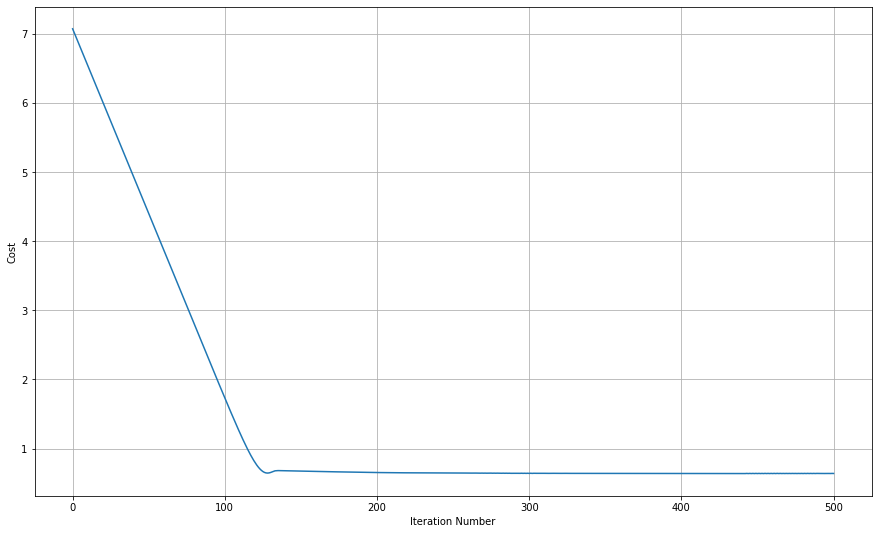

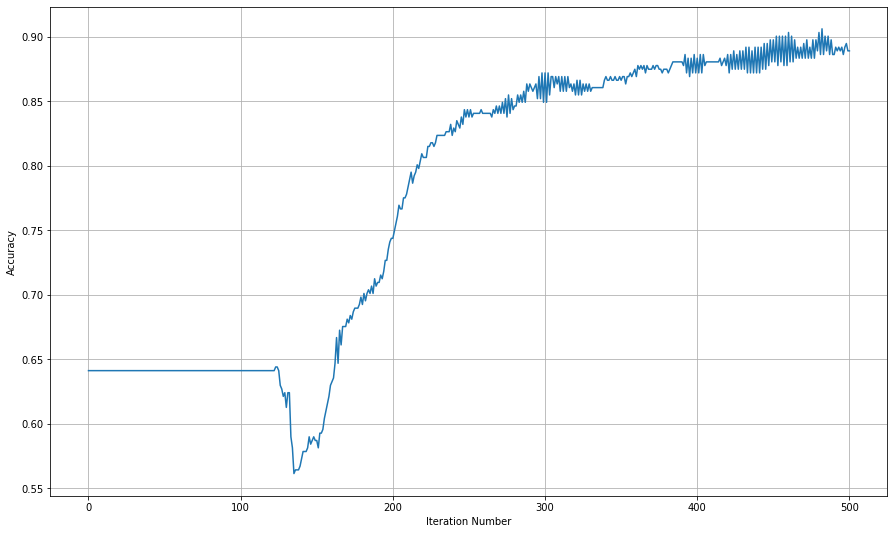

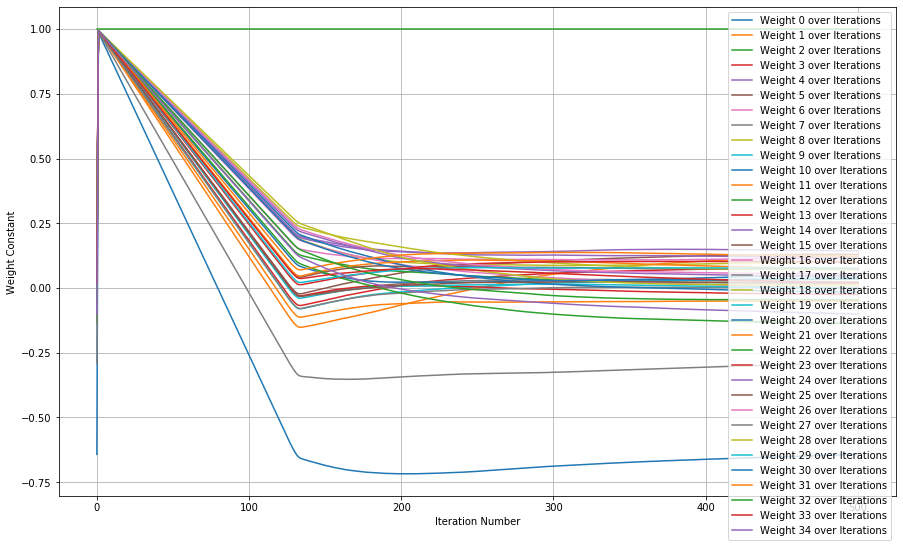

In [0]:
#============================================================================================================================================================================================================================================================================
#
# DIAGNOSTICS SUITE
#
#   This section was manually used by an observer (ie me, the coder) to see if the code's behaviour is matching my expectations.
#   Keep in mind this is not a formal test suite. It's not JUnit or a set of diagnostic tools that let me cover general and edge cases; it's just something that prints out things I am curious to see.
#
#============================================================================================================================================================================================================================================================================

#Construction Diagnostics
print("Instantiation and Construction Diagnostics: Sees if weights have been instantiated.")
lrm = LogisticRegressionModel(34)
print(lrm.getWeights())
print("====================================================================================================================================================================================================================================================================")
#SetWeights Diagnostics
print("Weights Setting Diagnostics: Sets weights to 0, then 1.")
m = np.zeros(35)
lrm.setWeights(m)
print(lrm.getWeights())
m = np.ones(35)
lrm.setWeights(m)
print(lrm.getWeights())
print("====================================================================================================================================================================================================================================================================")
#Basis Extender Diagnostics
print("Basis Extender Diagnostics: Sees if the addOnesForBasis function adds a column of ones to the left of the provided matrix.")
m = np.ones( (2,2) )
m[0][0] = 11
m[0][1] = 12
m[1][0] = 13
m[1][1] = 14
print(m)
print(lrm.__addOnesForBasis__(m))
print("====================================================================================================================================================================================================================================================================")
#Cost Function Diagnostics
print("Cost Function Diagnostics: See what the cost function produces.")
print( str( lrm.cost( ionosphereFeatures, ionosphereClassifications ) ) )
print("====================================================================================================================================================================================================================================================================")
#Evaluate_Accuracy Function Diagnostics
print("Evaluate_Acc Function Diagnostics: See what the accuracy function produces.")
print("Input X training data has " +str(len(ionosphereFeatures))+ " rows and " +str(len(ionosphereFeatures[0]))+ " columns.")
print( lrm.evaluate_acc( ionosphereFeatures , ionosphereClassifications ) )
print("====================================================================================================================================================================================================================================================================")
#Fit Function Diagnostics
print("fit Function Diagnostics: Use the fit functionality of our model and see how it looks.")
history = lrm.fit( ionosphereFeatures , ionosphereClassifications , 0.0001 , 500 , True , doGraphing=True, beVerbose=False)
print("completed fit operation.")
print("Now checking out its evaluation accuracy post-fit-function:")
print( lrm.evaluate_acc( ionosphereFeatures ,ionosphereClassifications ) )
print("Note that, at the moment, the system has effectively MEMORIZED THE FULL DATASET. Cross-K Validation was not applied; full dataset was used as test data for diagnostic purposes. A full test suite will need to follow.")
print("Creating Cost Over Iterations Figure")
graph_history(history,True)


## K-Cross Validation Function and testing on Ionosphere Logistic Regression Model

**The following is my logistic-regressions-specific K-Cross Validation Function.**

In [0]:
import numpy as np
import copy

#============================================================================================================================================================================================================================================================================
#
# K-CROSS VALIDATION
#
#   @Author: Edwin Pan of Group 101 of Winter 2020 COMP551 at McGill University
#
#   This section is a script for applying K-Cross Validation 
#
#============================================================================================================================================================================================================================================================================

def kCrossValidate(k,cleanModel,featuresDataset,classificationsDataset,learningRate=None,gradientDescentIterations=None):

  #Create a list ready to keep track of all the models ever made.
  allKModels = []

  #First, create all of the dataset partitions needed. 
  features_test_block =             []
  classifications_test_block  =     []
  features_training_block =         []
  classifications_training_block =  []
  dataset_size = classificationsDataset.size  #Total number of instances
  for fold in range(k):
    #Get the subsets
    lower_index = dataset_size*fold//k        #Get the lower bound index from the full dataset for the test dataset
    upper_index = dataset_size*(fold+1)//k    #Get the upper bound idnex from the full dataset for the test dataset
    #The Test Block of size 1/k per k
    features_test_block.append(         featuresDataset[(lower_index):(upper_index)]                )
    classifications_test_block.append(      classificationsDataset[(lower_index):(upper_index)]                 )
    #The Training Block of size (k-1)k per k
    if(lower_index==0):   #If we're dealing with the first fold
      features_training_block.append(                featuresDataset[upper_index:] )
      classifications_training_block.append(  classificationsDataset[upper_index:]   ) 
    elif(upper_index == dataset_size):    #If we're dealing with the last fold
      features_training_block.append(                featuresDataset[:lower_index] )  
      classifications_training_block.append(  classificationsDataset[:lower_index]  )
    else:
      #Note that these two following operations only work if lower_index is not 0 and upper_index is not the upper bound such that we get empty matrices.
      new_block_size = dataset_size - upper_index + lower_index;
      no_of_features = len(featuresDataset[0])
      #Before making the block, we need to make sure our new array will contain the right datatype. If we find string, make our array hold objects.
      datatype = type(float)
      for f in range(no_of_features):
        if not isinstance( featuresDataset[0][f], float ) and not isinstance( featuresDataset[0][f], int):
          datatype = object
          break
      #Make the new block
      new_features_block = np.zeros( (new_block_size,no_of_features), dtype=datatype )
      new_classes_block = np.zeros( new_block_size )
      j = 0 #Row being checked
      for i in range( lower_index ):
        for f in range(no_of_features):
          new_features_block[j][f] = featuresDataset[i][f]
        new_classes_block[j] = classificationsDataset[i]
        j += 1
      for i in range( upper_index, dataset_size ):
        for f in range(no_of_features):
          new_features_block[j][f] = featuresDataset[i][f]
        new_classes_block[j] = classificationsDataset[i]
        j += 1
      features_training_block.append( new_features_block )
      classifications_training_block.append( new_classes_block )
      #features_training_block.append(         np.concatenate(featuresDataset[:lower_index],(featuresDataset[upper_index:])) )   
      #classifications_training_block.append(  np.concatenate(classificationsDataset[:lower_index],(classificationsDataset[upper_index:]))   ) 
      
  #Now we start training and testing the model.
  average_accuracy = 0;
  for fold in range(k):
    print("Executing model fitting to fold number " + str(fold+1) + " of " + str(k) + ".")
    model = copy.deepcopy(cleanModel)
    if(learningRate==None or gradientDescentIterations==None):
      model.fit(trainingDataFeatures= features_training_block[fold], 
                trainingDataClasses=  classifications_training_block[fold]
                )
    else:
      model.fit(trainingDataFeatures=     features_training_block[fold], 
                trainingDataClasses=      classifications_training_block[fold], 
                learningRate=             learningRate, 
                gradientDescentIterations=gradientDescentIterations,
                beVerbose= False
                )
    fold_accuracy = model.evaluate_acc( X=(features_test_block[fold]), Y=(classifications_test_block[fold]) )
    average_accuracy += fold_accuracy
    print("Accuracy of fold number " + str(fold) + " is " + str(fold_accuracy) + ".")
    allKModels.append(model)
    continue
  average_accuracy /= k
  #Return the average accuracy obtained
  return average_accuracy, allKModels

In [0]:
ionosphere_LModel = LogisticRegressionModel(34)
average_accuracy, allKModels = kCrossValidate(5,ionosphere_LModel,ionosphereFeatures,ionosphereClassifications,0.0001,500)
print("The K-Cross Validated (K=5) accuracy of our model is " + str( average_accuracy ) )

In [0]:
for m in allKModels:
  print(m)

## Gaussian Naive Bayes Classifier Implementation and test with ionosphere

**The following is my Gaussian Naive Bayes Classifier Implementation.**

In [0]:
import numpy as np

#============================================================================================================================================================================================================================================================================
#
# GAUSSIAN NAIVE-BAYES MODEL CLASS
#
#   @Author: Edwin Pan of Group 101 of Winter 2020 COMP551 at McGill University
#
#============================================================================================================================================================================================================================================================================

class GaussianNaiveBayesModel:

  #Constructor and Instance Variables
  #@takes no_of_features, the amount of features that will be taken in
  #@takes no_of_classes, which is how many outputs are possible and being read in in integers (ie 2 indicates boolean, 3 indicates ternary, etc.)
  def __init__(self,no_of_features,no_of_classes):
    if(no_of_classes==1):
      print("Will not create model with one possible output.")
      return None
    self.class_prior = np.zeros( no_of_classes )
    self.mean = np.zeros( (no_of_features, no_of_classes) )
    self.variance = np.zeros( (no_of_features, no_of_classes) )
    return

  #helper binarizeGBClasses function
  #Takes a one-dimensional matrix and replaces elements of "g" with 1 and elements of "b" with 0.
  def __binarizeGBClasses__(self,matrix):
    for i in range(len(matrix)):
      if matrix[i]=="g":
        matrix[i] = 1
      elif matrix[i]=="b":
        matrix[i] = 0
    return matrix

  #helper normal function
  #Gives the probability of x occuring in normal function given the mean and variance
  def __normal__(self,x,m,v):
    if(v==0):
      return 0
    pi = 3.1415926535898535
    base = 1
    power = 1
    numerator = 1
    denumerator = (2*pi)**0.5*v
    e_numerator = 0-(x-m)**2
    e_denumerator = v**2*2
    base = numerator/denumerator
    power = e_numerator/e_denumerator
    return base*np.exp(power)

  #Fit function
  #@Takes DataFrame of training data, Double of learningRate, and Integer of gradientDescentIteration
  #@Returns nothing
  #Fits the model
  def fit(self, trainingDataFeatures, trainingDataClasses):
    trainingDataClasses = self.__binarizeGBClasses__(trainingDataClasses)
    lists_by_class = []
    #Calculate Class Prior first
    for c in range( len(self.class_prior) ):
      lists_by_class.append( [] )
      for i in range( trainingDataClasses.size ):
        if( trainingDataClasses[i] == c ):
          self.class_prior[c] = self.class_prior[c] + 1
          lists_by_class[c].append(i)
      self.class_prior[c] /= len(trainingDataClasses)
    #Now calculate the means and variances for all feature and class pairs
    for c in range( len(self.class_prior) ):
      #We first first calculate the Mean for each feature's classes:
      #Save the sum of the features for each class in each mean[f,c].
      for i in lists_by_class[c]:
        for f in range( len(self.mean) ):
          self.mean[f][c] += trainingDataFeatures[i][f]*1
      #Now divide each sum of features by the amount of features they were to obtain the mean.
      for f in range( len(self.mean) ):
        self.mean[f][c] /= ( len(lists_by_class[c]) )
      #Now that we know the mean for this class of value, we can now calculate the variances:
      #Save the sum the squared errors per instance of feature per class in variance[f][c].
      for i in lists_by_class[c]:
        for f in range( len(self.variance) ):
          self.variance[f][c] += (trainingDataFeatures[i][f]*1 - self.mean[f][c])**2
      #Now that we have the sum, we now take the average error squared and then squareroot that average
      for f in range( len(self.variance) ):
        self.variance[f][c] = ( self.variance[f][c]/(len(lists_by_class[c])) )**0.5
    return #Thus we now have our class priors as well as the means and variances values for calculating probabilities.

  #Predict function
  #@Takes in an input Series of input datapoint
  #@Returns the classification of the input datapoint classifications
  def predict(self, x):
    #Get an array in which we will put the probabilities of each class into
    output_probabilities = np.zeros( len(self.class_prior) )
    #Calculate the probability of each classification type
    for c in range( len(output_probabilities) ):
      prior_class_probability = 0
      conditional_probability = 1
      marginal_probability = 0
      #Prior
      prior_class_probability = self.class_prior[c]
      #Conditional of X given the c currently observed
      conditional_probability = 1
      for f in range( len(self.mean) ):
        if( self.variance[f][c] == 0):
          continue
        conditional_probability *= self.__normal__(x[f], self.mean[f][c], self.variance[f][c])
      #Marginal of X over all classes
      for k in range( len(output_probabilities) ):
        marginal_partial = 1;
        for f in range( len(self.mean) ):
          if( self.variance[f][k] == 0):
            continue
          marginal_partial *= self.__normal__(x[f], self.mean[f][k], self.variance[f][k])
        marginal_probability += marginal_partial
      #Calculate the output probability of this class c
      output_probabilities[c] = prior_class_probability*conditional_probability/marginal_probability
    greater_class = 0;
    for c in range(1,len(output_probabilities)):
      if( output_probabilities[greater_class] < output_probabilities[c] ):
        greater_class = c
    return greater_class

  #evaluate_acc method.
  #@Takes in Training Data (NxD Matrix) and Classifications (Nx1 Matrix);
  #@Returns the accuracy of the current weights
  def evaluate_acc(self, X, Y):
    everythingRight = 0
    everything = 0
    for i in range( len(X) ):  #For each instance
      if( self.predict( X[i] ) == Y[i] ):  #Use the model, predict the output with obtained features, and tally the result.
        everythingRight += 1
      everything += 1                 #don't forget the total count.
    return everythingRight/everything

In [0]:
#============================================================================================================================================================================================================================================================================
#
# DIAGNOSTICS SUITE
#
#   This section was manually used by an observer (ie me, the coder) to see if the code's behaviour is matching my expectations.
#   Keep in mind this is not a formal test suite. It's not JUnit or a set of diagnostic tools that let me cover general and edge cases; it's just something that prints out things I am curious to see.
#
#============================================================================================================================================================================================================================================================================

nvm = GaussianNaiveBayesModel( len(ionosphereFeatures[0]), 2 )
#Evaluate_Accuracy Function Diagnostics
print("Evaluate_Acc Function Diagnostics: See what the accuracy function produces.")
#print("Input X training data has " +str(len( ionosphereFeatures ))+ " rows and " +str( len(ionosphereFeatures[0]) )+ " columns.")
#print( ionosphereFeatures )
#print( ionosphereClassifications )
#print("====================================================================================================================================================================================================================================================================")
#Fit Function Diagnostics
print("fit Function Diagnostics: Use the fit functionality of our model and see how it looks.")
print("Fitting...")
history = nvm.fit( ionosphereFeatures , ionosphereClassifications )
print("Fitted")
print("Now checking out its evaluation accuracy post-fit-function:")
print("Accuracy : " +str(nvm.evaluate_acc( ionosphereFeatures , ionosphereClassifications ) ) +"." )

Evaluate_Acc Function Diagnostics: See what the accuracy function produces.
fit Function Diagnostics: Use the fit functionality of our model and see how it looks.
Fitting...
Fitted
Now checking out its evaluation accuracy post-fit-function:
Accuracy : 0.8290598290598291.


In [0]:
#CROSS VALIDATION ON FULL DATASET
ionosphere_GNBModel = GaussianNaiveBayesModel( len(ionosphereFeatures[0]), 2 )
print("The K-Cross Validated (K=5) accuracy of our model is " + str(kCrossValidate(5,ionosphere_GNBModel,ionosphereFeatures,ionosphereClassifications)) +".")

Executing model fitting to fold number 1 of 5.
Accuracy of fold number 0 is 0.8571428571428571.
Executing model fitting to fold number 2 of 5.
Accuracy of fold number 1 is 0.7857142857142857.
Executing model fitting to fold number 3 of 5.
Accuracy of fold number 2 is 0.8714285714285714.
Executing model fitting to fold number 4 of 5.
Accuracy of fold number 3 is 0.8.
Executing model fitting to fold number 5 of 5.
Accuracy of fold number 4 is 0.5915492957746479.
The K-Cross Validated (K=5) accuracy of our model is (0.7811670020120725, [<__main__.GaussianNaiveBayesModel object at 0x7f5a62c0cb00>, <__main__.GaussianNaiveBayesModel object at 0x7f5a62c0cac8>, <__main__.GaussianNaiveBayesModel object at 0x7f5a62c0ce80>, <__main__.GaussianNaiveBayesModel object at 0x7f5a62c0ccc0>, <__main__.GaussianNaiveBayesModel object at 0x7f5a62c0cf60>]).


## Hybrid Naive Bayes Classifier Implementation and test with ionosphere

**The following is my Hybrid Categorical-and-Gaussian Bayes model. Instead of taking in only numeric features in which it finds the expected and variance values, it also checks for binary or categorical features.**

In [0]:
import numpy as np

#============================================================================================================================================================================================================================================================================
#
# HYBRID NAIVE-BAYES MODEL CLASS
#
#   @Author: Edwin Pan of Group 101 of Winter 2020 COMP551 at McGill University
#
#============================================================================================================================================================================================================================================================================

class HybridNaiveBayesModel:

  #The strategy for figuring out whether or not each feature scanned in is categorical (binary or multinomial) or gaussian will be to save
  #parametres for predicting conditional and joint probabilities for each feature as an object which will have a descriptor for how
  #it is meant to be used. The object, namely its class, are defined as follows.
  #NOTE: THE ASSUMPTION WITH HAVING MULTIPLE CLASSIFICATIONS IS THAT EACH CLASSIFICATION IS MERELY ENUMERATED STARTED AT 0 TO C-1.
  class FeatureModel:
    __UNDEFINED_TYPE__ = "UNFIT"
    __BINARY_TYPE__ = "BINARY"
    __CATEGORICAL_TYPE__ = "CATEGORICAL"
    __GAUSSIAN_TYPE__ = "GAUSSIAN"
    __UNCONSEQUENTIAL_TYPE__ = "UNCONSEQUENTIAL"

    def __init__(self,name):
      self.name = name
      self.__type__ = self.__UNDEFINED_TYPE__
      return

    #Fit this feature with the data of a single feature and the associated classification data.
    def fit(self,single_feature_set,single_feature_set_classifications):
      #First we need to figure out what kind of type our feature is.
      #Getting some stats for analysis of our input features
      feature_inputs = []
      is_gaussian_by_floats = False #The presence of floating point numbers that aren't whole numbers indicate gaussian.
      is_categorical_by_strings = False #The presence of strings that do not represent numbers indicates a categorical nature.
      #Loop over full set of inputs and draw some data or conclusions
      for instance in single_feature_set:
        #If we know it's Gaussian, we need not look further
        if is_gaussian_by_floats:
          break
        #Avoid repeating values but analyze new ones
        instance_already_contained = False
        for already_contained in feature_inputs:
          if already_contained == instance:
            instance_already_contained = True
            break
        if not instance_already_contained:
          if isinstance(instance,float) and instance%1 != 0:
            is_gaussian_by_floats = True
          elif isinstance(instance,str) and not instance.replace('.','').isdigit():
            is_categorical_by_strings = True
          feature_inputs.append(instance)
      no_of_feature_inputs = len(feature_inputs)

      #Now let's figure out what output classes we need and how many there are of each
      instances_of_classification = {}
      for c in single_feature_set_classifications:
        if c in instances_of_classification:
          instances_of_classification[c] = instances_of_classification[c] + 1
        else:
          instances_of_classification[c] = 1
      no_of_classifications = len(instances_of_classification)

      #Deciding based on stats what type our feature is
      if is_gaussian_by_floats: #If there were non-whole number floats then it's Gaussian for sure.
        self.__type__ = self.__GAUSSIAN_TYPE__
      elif is_categorical_by_strings: #If there were strings that weren't numbers, then we must treat it as categorical.
        self.__type__ = self.__CATEGORICAL_TYPE__
      elif no_of_feature_inputs <= 1: #If this feature always produces a single input, then our data doesn't really say anything. We'll ignore it in probabilities.
        self.__type__ = self.__UNCONSEQUENTIAL_TYPE__
      elif no_of_feature_inputs == 2: #If there were only two input feature values
        if 0 in instances_of_classification and 1 in instances_of_classification:   #If it's 0 and 1, it's binary
          self.__type__ = self.__BINARY_TYPE__
        else:  #if it's not 0's and 1's, it's binary but in a weird way that we put under the umbrella of categorical as we use a dictionary for this.
          self.__type__ = self.__CATEGORICAL_TYPE__
      else: #If we have been dealing integer inputs that are not binary and are in greater variety than just two inputs, it may still be gaussian.
        feature_inputs.sort()
        found_skipped_category = False  #WE WILL MAKE THE BAD ASUMPTION THAT IF THE FEATURE IS CATEGORICAL, WE WILL WITNESS ALL 0-TO-N CATEGORIES.
        for i in range( len(feature_inputs) ): #Check if any numbers are skipped
          if i != feature_inputs[i]:
            found_skipped_category = True
            break
        if(found_skipped_category):
          self.__type__ = self.__GAUSSIAN_TYPE__
        else:
          self.__type__ = self.__CATEGORICAL_TYPE__

      #Now that we know what our inputs and outputs are, we can set up our variables.
      if( self.__type__ == self.__GAUSSIAN_TYPE__ ):

        #Knowing we are Gaussian Type, we can establish Gaussian Probability Values
        self.mean = {}
        self.variance = {}
        for c in instances_of_classification:
          self.mean[c] = 0
          self.variance[c] = 0
        #Calculate mean across all classifications by this feature
        for i in range(len(single_feature_set)):
          self.mean[ single_feature_set_classifications[i] ] += single_feature_set[i]*1
        for c in instances_of_classification:
          self.mean[c] = self.mean[c]/instances_of_classification[c]
        #Calculate variance across all classifications by this feature
        for i in range(len(single_feature_set)):
          self.variance[ single_feature_set_classifications[i] ] += ( single_feature_set[i]*1 - self.mean[ single_feature_set_classifications[i] ] )**2
        for c in instances_of_classification:
          self.variance[c] = ( self.variance[c]/instances_of_classification[c] )**0.5
        #Thus we have obtained the mean input features and variance of input features for the each classification of this feature

      elif( self.__type__ == self.__BINARY_TYPE__ ):
        #Okay well this is as straightforward as it gets. We just need the bernoulli probability constant
        self.u = [ instances_of_classification[0]/no_of_classifications, instances_of_classification[1]/no_of_classifications ]
        #This yields us the probabilities of obtaining u[x] for c=1. c=0 is u[(x+1)%2], ie the inverted version of u[x].

      elif( self.__type__ == self.__CATEGORICAL_TYPE__ ):
        #Here we need to calculate how much of the probability space belongs to each categorical feature.
        self.p = {}
        for f in feature_inputs:
          self.p[f] = {}
          for c in instances_of_classification:
            self.p[f][c] = 0
        for i in range( len(single_feature_set) ):
          self.p[ single_feature_set[i] ][ single_feature_set_classifications[i] ] += 1
        for f in feature_inputs:
          for c in instances_of_classification:
            self.p[f][c] /= len( single_feature_set )
        #This yields us the probabilities per category of p[f] for each classification p[f][c].

      #And that should complete the fitting.
      return

    #Predict - ie, produce the marginal probability of feature input x given classification c.
    def predict(self,x,c):
      if self.__type__ == self.__GAUSSIAN_TYPE__:
        if(self.variance[c] == 0):
          return 1  #Bad case: If there's no variance, ignore this feature in calculating conditionals and marginals.
        return self.__normal__(x,self.mean[c],self.variance[c])
      if self.__type__ == self.__BINARY_TYPE__:
        return self.u[ (c+(int(x)+1)%2)%2 ]
      if self.__type__ == self.__CATEGORICAL_TYPE__:
        if x in self.p.keys():
          return self.p[x][c]
        else:   #If we are dealing with a category we have never seen before, we really can't say anything about it. Release a 1 such that the posterior probability basically ignores this feature.
          return 1
      if self.__type__ == self.__UNCONSEQUENTIAL_TYPE__:
        return 1
      

    #helper normal function
    #Gives the probability of x occuring in normal function given the mean and variance
    def __normal__(self,x,m,v):
      if(v==0):
        return 0
      pi = 3.1415926535898535
      base = 1
      power = 1
      numerator = 1
      denumerator = (2*pi)**0.5*v
      e_numerator = 0-(x-m)**2
      e_denumerator = v**2*2
      base = numerator/denumerator
      power = e_numerator/e_denumerator
      return base*np.exp(power)

    #Useful Debugging Method
    def whoAreYou(self):
      print("I am feature model " + str(self.name) + ". I am a " + self.__type__ + " feature model.")
      weights_descriptors = ""
      if(self.__type__ == self.__GAUSSIAN_TYPE__):
        weights_descriptors = "mean: " + str( self.mean ) + "; \tvariance: " + str(self.variance)
      elif(self.__type__ == self.__BINARY_TYPE__):
        weights_descriptors = "u: " + str(self.u)
      elif(self.__type__ == self.__CATEGORICAL_TYPE__):
        weights_descriptors = "p: " + str(self.p)
      print("My weights follow as: \t" + weights_descriptors)
      return

  #End of featureModel class



  #Constructor and Instance Variables
  #@takes no_of_features, the amount of features that will be taken in
  #@takes no_of_classifcations, which is how many outputs are possible and being read in in integers (ie 2 indicates boolean, 3 indicates ternary, etc.)
  def __init__(self,no_of_features,no_of_classifcations):
    if(no_of_classifcations==1):
      print("Will not create model with one possible output.")
      return None
    self.class_prior = np.zeros( no_of_classifcations )
    self.feature_models = {}
    return

  #helper binarizeGBClasses function
  #Takes a one-dimensional matrix and replaces elements of "g" with 1 and elements of "b" with 0.
  def __binarizeGBClasses__(self,matrix):
    for i in range(len(matrix)):
      if matrix[i]=="g":
        matrix[i] = 1
      elif matrix[i]=="b":
        matrix[i] = 0
    return matrix

  #Fit function
  #@Takes DataFrame of training data, Double of learningRate, and Integer of gradientDescentIteration
  #@Returns nothing
  #Fits the model
  def fit(self, trainingDataFeatures, trainingDataClasses):
    #Cleaning b and g if present
    trainingDataClasses = self.__binarizeGBClasses__(trainingDataClasses)
    #Calculating prior
    for c in range( len(self.class_prior) ):
      self.class_prior[c] = 0
      for i in range( trainingDataClasses.size ):
        if( trainingDataClasses[i] == c ):
          self.class_prior[c] = self.class_prior[c] + 1
      self.class_prior[c] /= len(trainingDataClasses)
    #Feature Fitting
    #This class fits to datasets on a per-feature basis. As such, we iterate for each feature 
    #and create the feature_models which give us the probatilities for each feature when calculating
    #the final posterior probability
    for feature in range( len( trainingDataFeatures[0] ) ):
      feature_dataset = (trainingDataFeatures[:,feature]).T
      self.feature_models[feature] = self.FeatureModel(feature)
      self.feature_models[feature].fit( feature_dataset, trainingDataClasses )
    return

  #Predict function
  #@Takes in an input Series of input datapoint
  #@Returns the classification of the input datapoint classifications
  def predict(self, x):
    #Get an array in which we will put the probabilities of each class into
    output_probabilities = np.zeros( len(self.class_prior) )
    #Calculate the probability of each classification type
    for c in range( len(output_probabilities) ):
      prior_class_probability = 0
      conditional_probability = 1
      marginal_probability = 0
      #Prior
      prior_class_probability = self.class_prior[c]
      #Conditional of X given the c currently observed
      conditional_probability = 1
      for f in range( len(x) ):
        conditional_probability *= self.feature_models[f].predict(x[f],c)
      #Marginal of X over all classes
      for k in range( len(output_probabilities) ):
        marginal_partial = 1;
        for f in range( len(x) ):
          marginal_partial *= self.feature_models[f].predict(x[f],k)
        marginal_probability += marginal_partial
      #Calculate the output probability of this class c
      output_probabilities[c] = prior_class_probability*conditional_probability/marginal_probability
    greater_class = 0;
    for c in range(1,len(output_probabilities)):
      if( output_probabilities[greater_class] < output_probabilities[c] ):
        greater_class = c
    return greater_class

  #evaluate_acc method.
  #@Takes in Training Data (NxD Matrix) and Classifications (Nx1 Matrix);
  #@Returns the accuracy of the current weights
  def evaluate_acc(self, X, Y):
    everythingRight = 0
    everything = 0
    for i in range( len(X) ):  #For each instance
      if( self.predict( X[i] ) == Y[i] ):  #Use the model, predict the output with obtained features, and tally the result.
        everythingRight += 1
      everything += 1                 #don't forget the total count.
    return everythingRight/everything

In [0]:
#============================================================================================================================================================================================================================================================================
#
# DIAGNOSTICS SUITE
#
#   This section was manually used by an observer (ie me, the coder) to see if the code's behaviour is matching my expectations.
#   Keep in mind this is not a formal test suite. It's not JUnit or a set of diagnostic tools that let me cover general and edge cases; it's just something that prints out things I am curious to see.
#
#============================================================================================================================================================================================================================================================================

nvm = HybridNaiveBayesModel( len(ionosphereFeatures[0]), 2 )
#Evaluate_Accuracy Function Diagnostics
print("Evaluate_Acc Function Diagnostics: See what the accuracy function produces.")
#print("Input X training data has " +str(len( ionosphereFeatures ))+ " rows and " +str( len(ionosphereFeatures[0]) )+ " columns.")
#print( ionosphereFeatures )
#print( ionosphereClassifications )
#print("====================================================================================================================================================================================================================================================================")
#Fit Function Diagnostics
print("fit Function Diagnostics: Use the fit functionality of our model and see how it looks.")
print("Fitting...")
history = nvm.fit( ionosphereFeatures , ionosphereClassifications )
print("Fitted")
print("Now checking out its evaluation accuracy post-fit-function:")
print("Accuracy : " +str(nvm.evaluate_acc( ionosphereFeatures , ionosphereClassifications ) ) +"." )

Evaluate_Acc Function Diagnostics: See what the accuracy function produces.
fit Function Diagnostics: Use the fit functionality of our model and see how it looks.
Fitting...
Fitted
Now checking out its evaluation accuracy post-fit-function:
Accuracy : 0.8376068376068376.


In [0]:
#CROSS VALIDATION
ionosphere_HNBModel = HybridNaiveBayesModel( len(ionosphereFeatures[0]), 2 )
print("The K-Cross Validated (K=5) accuracy of our model is " + str(kCrossValidate(5,ionosphere_HNBModel,ionosphereFeatures,ionosphereClassifications)) +".")

Executing model fitting to fold number 1 of 5.
Accuracy of fold number 0 is 0.8714285714285714.
Executing model fitting to fold number 2 of 5.
Accuracy of fold number 1 is 0.7857142857142857.
Executing model fitting to fold number 3 of 5.
Accuracy of fold number 2 is 0.8714285714285714.
Executing model fitting to fold number 4 of 5.
Accuracy of fold number 3 is 0.8.
Executing model fitting to fold number 5 of 5.
Accuracy of fold number 4 is 0.5915492957746479.
The K-Cross Validated (K=5) accuracy of our model is (0.7840241448692152, [<__main__.HybridNaiveBayesModel object at 0x7f5a62c7be10>, <__main__.HybridNaiveBayesModel object at 0x7f5a646ff9e8>, <__main__.HybridNaiveBayesModel object at 0x7f5a646ff240>, <__main__.HybridNaiveBayesModel object at 0x7f5a62cd0eb8>, <__main__.HybridNaiveBayesModel object at 0x7f5a646ca390>]).


## Testing Different Test-Training Ratios of Ionosphere Dataset on classifiers

In [0]:
#Method for extracting a training features and classifications dataset as well as testing features and classifications dataset given a ratio.
def extractTrainTestPartitions( featuresDataset, classificationsDataset, ratioNumerator, ratioDenumerator, offset):
  #First get the indices of the rows that will be used for training and testing.
  totalInstances = len(featuresDataset)
  numberOfFeatures = len(featuresDataset[0])
  trainingRows = []
  testingRows = []
  oneOf = 0 + offset
  for i in range(totalInstances):
    if oneOf < ratioNumerator:
      trainingRows.append(i)
    else:
      testingRows.append(i)
    oneOf = (oneOf+1)%ratioDenumerator
  #Now creates the training and testing features and classifications datasets
  trainingFeatures = np.zeros( (len(trainingRows),numberOfFeatures) )
  trainingClassifications = np.zeros( len(trainingRows) )
  testingFeatures = np.zeros( (len(testingRows),numberOfFeatures) )
  testingClassifications = np.zeros( len(testingRows) )
  insertingToRow = 0
  for i in trainingRows:
    for f in range(numberOfFeatures):
      trainingFeatures[insertingToRow][f] = featuresDataset[i][f]
    trainingClassifications[insertingToRow] = classificationsDataset[i]
    insertingToRow += 1
  insertingToRow = 0
  for i in testingRows:
    for f in range(numberOfFeatures):
      testingFeatures[insertingToRow][f] = featuresDataset[i][f]
    testingClassifications[insertingToRow] = classificationsDataset[i]
    insertingToRow += 1
  #We should now have the training and testing features and classifications datasets ready to use. Return all of them.
  return trainingFeatures, trainingClassifications, testingFeatures, testingClassifications

Executing accuracy train-test of ratio 1/10.
Executing accuracy train-test of ratio 2/10.
Executing accuracy train-test of ratio 3/10.
Executing accuracy train-test of ratio 4/10.
Executing accuracy train-test of ratio 5/10.
Executing accuracy train-test of ratio 6/10.
Executing accuracy train-test of ratio 7/10.
Executing accuracy train-test of ratio 8/10.
Executing accuracy train-test of ratio 9/10.


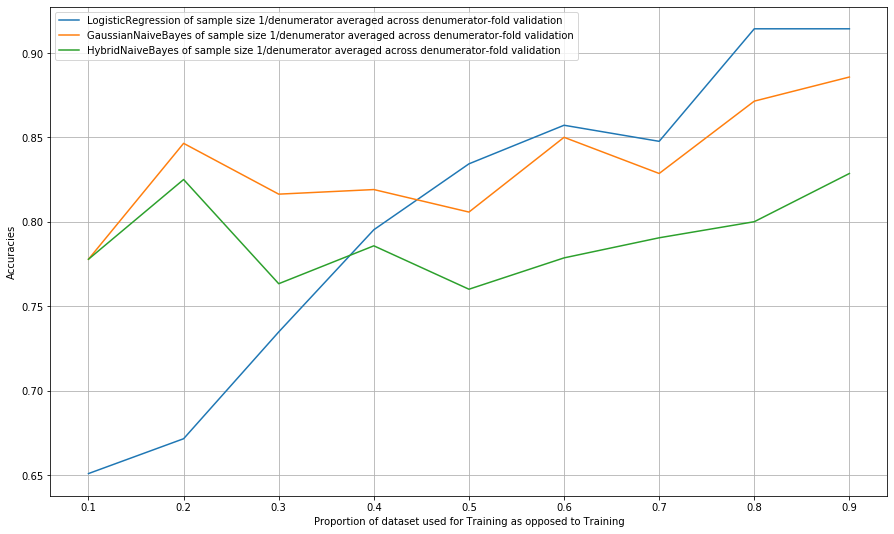

In [0]:
#DENUM CONSTANT
#If denumerator = 5, then the chunks will be in size 20%, 40%, 60%, 80%, and 100%
denumerator = 10

#Script Constants
ionosphere_LearningRate = 0.0001
ionosphere_GDIterations = 1000

#Set up data variables
AccuracyOfTraintTestRatiosForModel = {}
AccuracyOfTraintTestRatiosForModel["LogisticRegression"] = {}
AccuracyOfTraintTestRatiosForModel["GaussianNaiveBayes"] = {}
AccuracyOfTraintTestRatiosForModel["HybridNaiveBayes"] = {}

#Models
ionosphere_LRM = LogisticRegressionModel( len(ionosphereFeatures[0]) )
ionosphere_GNBM = GaussianNaiveBayesModel( len(ionosphereFeatures[0]), 2 )
ionosphere_HNBM = HybridNaiveBayesModel( len(ionosphereFeatures[0]), 2 )

#for each numerator over constant denumerator
for numerator in range(1,denumerator):
  AccuracyOfTraintTestRatiosForModel["LogisticRegression"][numerator] = 0
  AccuracyOfTraintTestRatiosForModel["GaussianNaiveBayes"][numerator] = 0
  AccuracyOfTraintTestRatiosForModel["HybridNaiveBayes"][numerator]   = 0
  print("Executing accuracy train-test of ratio " + str(numerator) + "/" + str(denumerator) + ".")
  trainingFeatures, trainingClassifications, testingFeatures, testingClassifications = extractTrainTestPartitions(ionosphereFeatures, ionosphereClassifications, numerator,denumerator,0)
  ionosphere_LRM_trainTest_History = ionosphere_LRM.fit(trainingFeatures,trainingClassifications,ionosphere_LearningRate,ionosphere_GDIterations,trackAccuracyOverIterations=False, doGraphing=False, beVerbose=False)
  ionosphere_GNBM.fit(trainingFeatures,trainingClassifications)
  ionosphere_HNBM.fit(trainingFeatures,trainingClassifications)
  AccuracyOfTraintTestRatiosForModel["LogisticRegression"][numerator] += ionosphere_LRM.evaluate_acc(testingFeatures,testingClassifications)
  AccuracyOfTraintTestRatiosForModel["GaussianNaiveBayes"][numerator] += ionosphere_GNBM.evaluate_acc(testingFeatures,testingClassifications)
  AccuracyOfTraintTestRatiosForModel["HybridNaiveBayes"][numerator]  += ionosphere_HNBM.evaluate_acc(testingFeatures,testingClassifications)
  #for offset in range(denumerator): #Integrated Cross Validation
  #  print("Executing accuracy train-test of ratio " + str(numerator) + "/" + str(denumerator) + " with offset " + str(offset) +".")
  #  trainingFeatures, trainingClassifications, testingFeatures, testingClassifications = extractTrainTestPartitions(ionosphereFeatures, ionosphereClassifications, numerator,denumerator,offset)
  #  ionosphere_LRM_trainTest_History = ionosphere_LRM.fit(trainingFeatures,trainingClassifications,ionosphere_LearningRate,ionosphere_GDIterations,True)
  #  graph_history(ionosphere_LRM_trainTest_History,True)
  #  ionosphere_GNBM.fit(trainingFeatures,trainingClassifications)
  #  ionosphere_HNBM.fit(trainingFeatures,trainingClassifications)
  #  print(ionosphere_LRM.evaluate_acc(testingFeatures,testingClassifications))
  #  AccuracyOfTraintTestRatiosForModel["LogisticRegression"][numerator] += ionosphere_LRM.evaluate_acc(testingFeatures,testingClassifications)/denumerator
  #  AccuracyOfTraintTestRatiosForModel["GaussianNaiveBayes"][numerator] += ionosphere_GNBM.evaluate_acc(testingFeatures,testingClassifications)/denumerator
  #  AccuracyOfTraintTestRatiosForModel["HybridNaiveBayes"][numerator]  += ionosphere_HNBM.evaluate_acc(testingFeatures,testingClassifications)/denumerator

#Now plot the data
import matplotlib.pyplot as plt
accuraciesOverDenumFigure = plt.figure()
accuraciesOverDenumFigure.set_figheight(9)
accuraciesOverDenumFigure.set_figwidth(15)
accuracyOverDenumPlot = accuraciesOverDenumFigure.add_subplot(1,1,1)
for k,v in AccuracyOfTraintTestRatiosForModel.items():
  accuracies = []
  for sk, sv in v.items():
    accuracies.append(sv)
  ratios = []
  for numerator in range(denumerator-1):
    ratios.append( (numerator+1)/denumerator )
  accuracyOverDenumPlot.plot( ratios, accuracies, label=(str(k)+" of sample size 1/denumerator averaged across denumerator-fold validation") )

accuracyOverDenumPlot.set_xlabel("Proportion of dataset used for Training as opposed to Training")
accuracyOverDenumPlot.set_ylabel("Accuracies")
accuracyOverDenumPlot.legend()
accuracyOverDenumPlot.grid()
accuraciesOverDenumFigure.show()

In [0]:
#Print out the data:
print("Printing AccuracyOfTraintTestRatiosForModel dictionaries. Note that the indices indicates the numerator applied for the ratio over the denumerator which should be " + str(denumerator) + ".")
print("LogisticRegression:")
print(AccuracyOfTraintTestRatiosForModel["LogisticRegression"])
print("GaussianNaiveBayes:")
print(AccuracyOfTraintTestRatiosForModel["GaussianNaiveBayes"])
print("HybridNaiveBayes:")
print(AccuracyOfTraintTestRatiosForModel["HybridNaiveBayes"])

Printing AccuracyOfTraintTestRatiosForModel dictionaries. Note that the indices indicates the numerator applied for the ratio over the denumerator which should be 10.
LogisticRegression:
{1: 0.6507936507936508, 2: 0.6714285714285714, 3: 0.7346938775510204, 4: 0.7952380952380952, 5: 0.8342857142857143, 6: 0.8571428571428571, 7: 0.8476190476190476, 8: 0.9142857142857143, 9: 0.9142857142857143}
GaussianNaiveBayes:
{1: 0.7777777777777778, 2: 0.8464285714285714, 3: 0.8163265306122449, 4: 0.819047619047619, 5: 0.8057142857142857, 6: 0.85, 7: 0.8285714285714286, 8: 0.8714285714285714, 9: 0.8857142857142857}
HybridNaiveBayes:
{1: 0.7777777777777778, 2: 0.825, 3: 0.763265306122449, 4: 0.7857142857142857, 5: 0.76, 6: 0.7785714285714286, 7: 0.7904761904761904, 8: 0.8, 9: 0.8285714285714286}


# OTHER DATASETS (EXTRA)

***USE ON OTHER DATASETS***
**Here, I test my Logistic Regression, Gaussian Naive Bayes, and Hybrid Naive Bayes machine learning models on the datasets that my teammates worked with - namely, the Adult dataset, the Wine dataset, and the Cancer dataset. I am curious as to how well my model works on theirs. This should also let me check for bugs in my models.**

In [0]:
#This is the data importing script for the three other datasets for my group's project.
#You probably don't want to re-run this script all that often, since it requires waiting.

import pandas as pd
import numpy as np

#==============================================================================================================
#
#   Handy Function for all additional importing
#
#==============================================================================================================

#Reusable script for getting rid of "?" and " ?" malformed values and getting the array with 
#columns except for the last and the array of the last column (last column is typically classification. 
#If this is not the case, do not use this function.)
def extractUsefulArrays( dataframe ):
  #Drop incomplete data instances
  bad_rows = []
  for i in range( len(dataframe[0]) ):
    for f in range( len(dataframe.keys()) ):
      if dataframe[f][i] == "?" or dataframe[f][i] == " ?": #the two types of "missing"-type arguments noticed by those who worked on the following datasets
        bad_rows.append(i)
        break
  dataframe = dataframe.drop( labels=bad_rows, axis="index" )
  dataframe = dataframe.reset_index(drop=True)
  #Build the features and classifications array to return.
  classificationsArray = dataframe[ len(dataframe.keys())-1 ].to_numpy()
  featuresArray = dataframe.drop( len(dataframe.keys())-1 , axis=1 ).to_numpy()
  #Return the useful arrays
  return featuresArray, classificationsArray

Setting up standard parametres for tests

In [0]:
#Variables Handy for Keeping Track of the results for the next datasets

kCVA_Results = {}  #Dictionary where we hold logs of the results
K = 5   #Number of folds
LEARNING_RATE = 0.00005   #Standard learning rate between logistic regression models
GRADIENT_DESCENT_ITERATIONS = 200 #standard gardient descent iterations between logistic regression models
LEARNING_RATE_WINES = 0.000025
GRADIENT_DESCENT_ITERATIONS_WINES = 400
LEARNING_RATE_ADULT = 0.000005
GRADIENT_DESCENT_ITERATIONS_ADULT = 100

## CANCER DATASET IMPORT

In [0]:
import pandas as pd
import numpy as np

#==============================================================================================================
#
#   Data Importing
#
#==============================================================================================================

#Import Cancer dataset.
cancer_dataframe = pd.read_csv("/content/drive/My Drive/COMP551-W2020-Datasets/project1/breast-cancer-wisconsin.data",header=None)
#Clean and separate imported dataset into useful arrays
cancerFeatures, cancerClassifications = extractUsefulArrays(cancer_dataframe)
#Binarize classifications
for i in range(len(cancerClassifications)):
  if cancerClassifications[i] == 4:
    cancerClassifications[i] = 1
  else:
    cancerClassifications[i] = 0
#UNIQUE FIX:
#   For some reason, there is an entire column of string after conversion from pandas to numpy and whatever. We need to fix that.
for i in range(len(cancerFeatures)):
  cancerFeatures[i][6] = float(cancerFeatures[i][6])
#Normalize all feature input columns
for column in range( len(cancerFeatures[0]) ):
  vector = []
  for instance in range(len(cancerFeatures)):
    vector.append( cancerFeatures[instance][column] )
  vector = normalize_vector(vector)
  for instance in range(len(cancerFeatures)):
    cancerFeatures[instance][column] = vector[instance]

#Manual import checks
print(len(cancerClassifications))
print(cancerClassifications)
for i in range(5):
  print(cancerFeatures[i])

683
[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 

Using the cancer dataset to test my Logistic Regression, Gaussian Naive Bayes, and Hybrid Naive Bayes models

### Cancer Dataset Testing - Logistic Regression Model

Executing gradient descent iteration number 10 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 20 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 30 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 40 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 50 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 60 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 70 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 80 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 90 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 100 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 110 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 120 of 200 with learning rate 5e-05.
Executing gradient descent iteration 

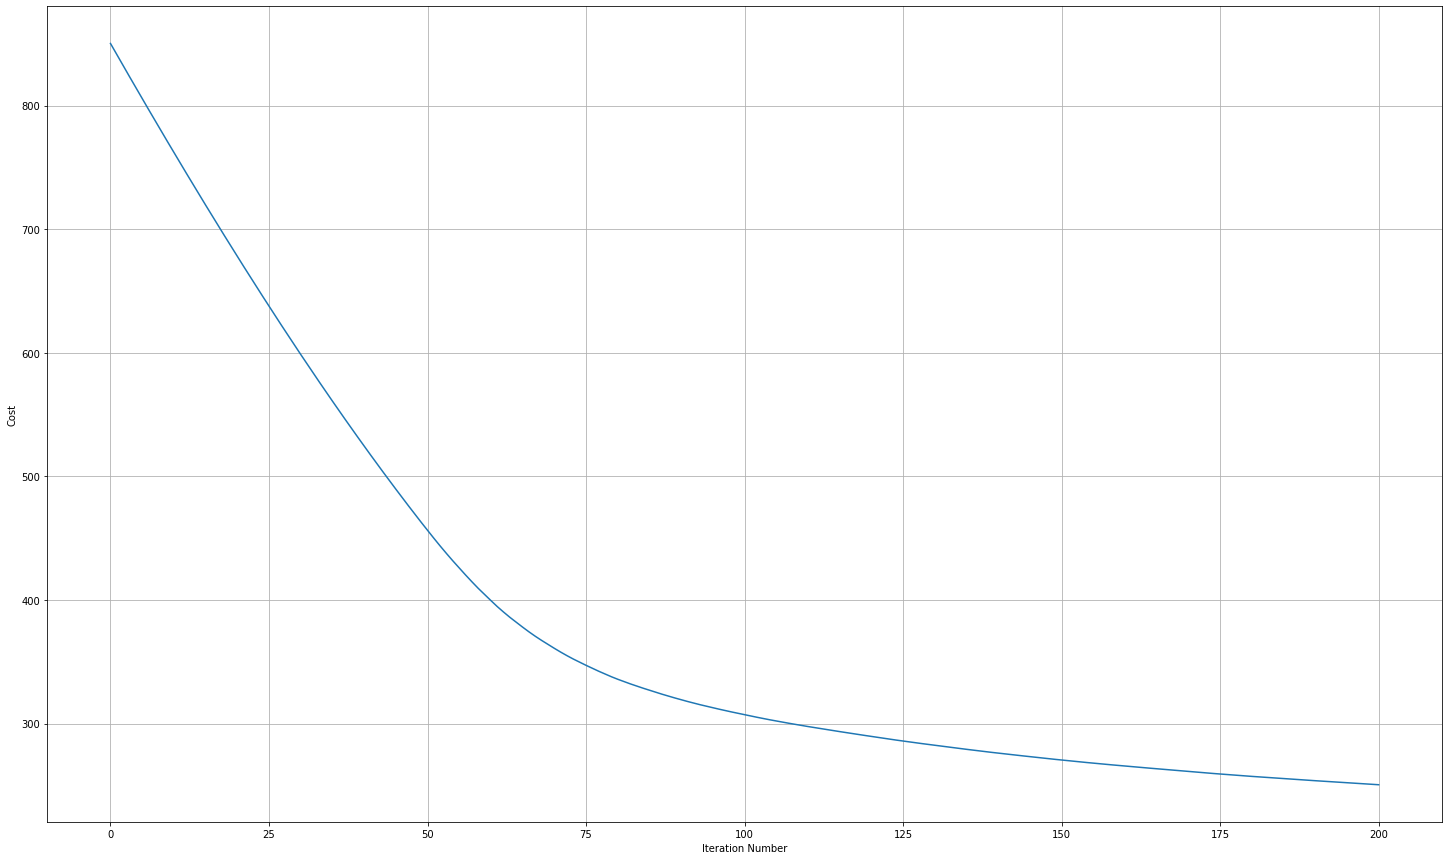

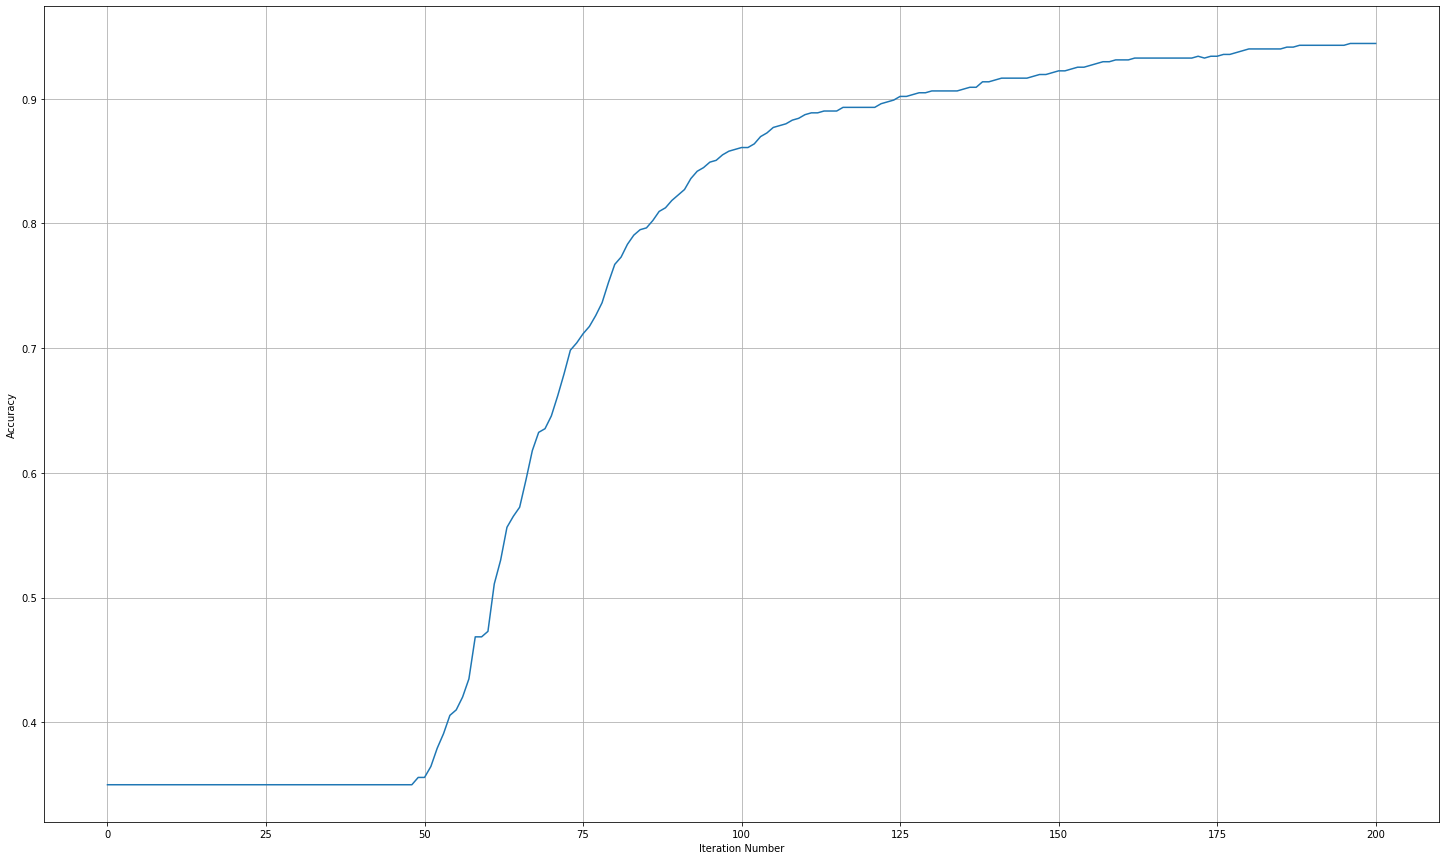

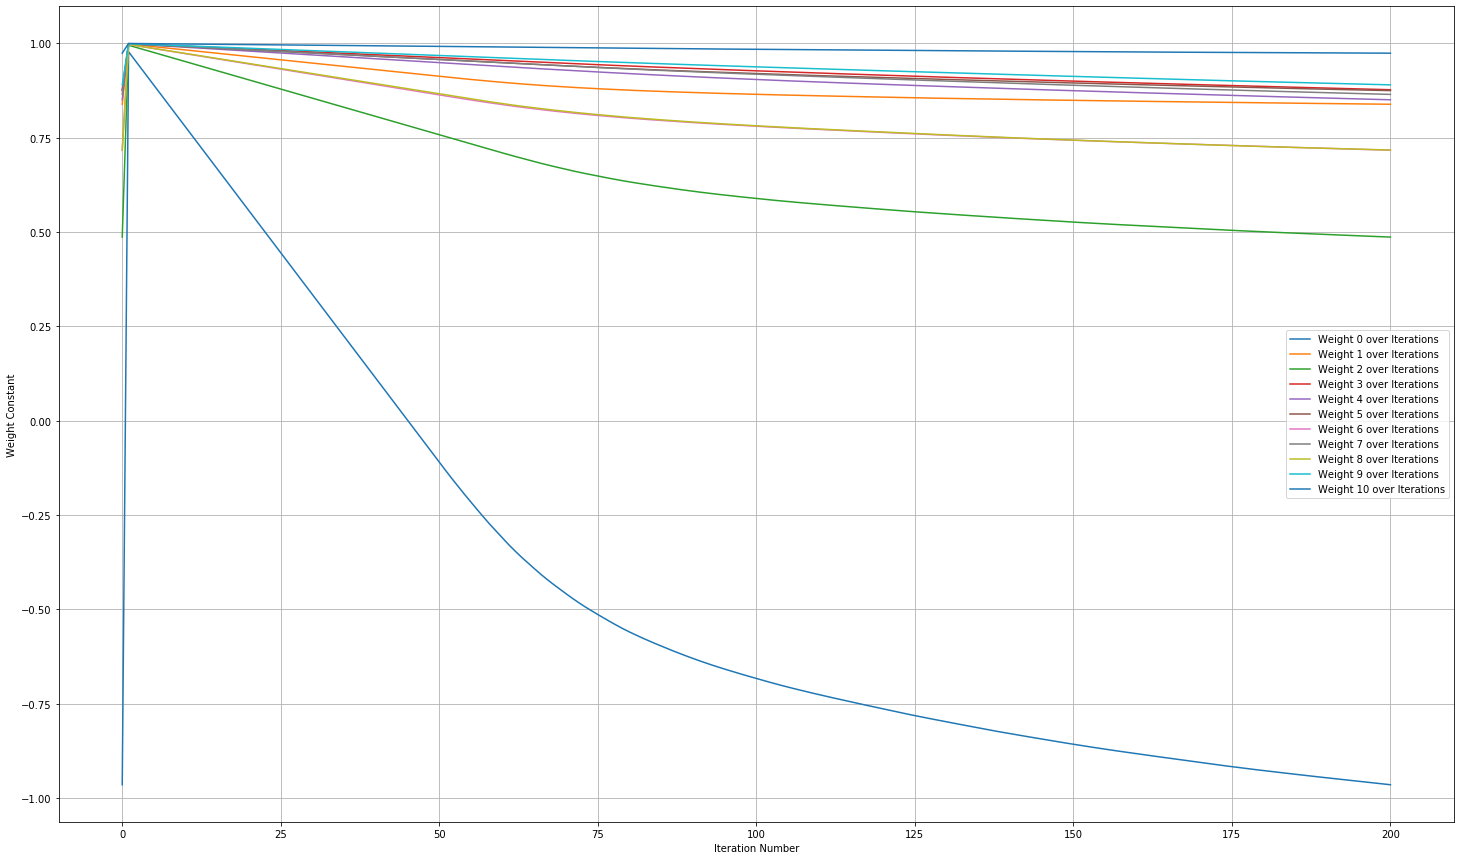

In [0]:
#Cancer Logistic Regression Model
cancer_LRM = LogisticRegressionModel( len(cancerFeatures[0]) )
cancer_history = cancer_LRM.fit( cancerFeatures , cancerClassifications , LEARNING_RATE , GRADIENT_DESCENT_ITERATIONS , True )
print("Accuracy of cancer_LRM: " + str(cancer_LRM.evaluate_acc(cancerFeatures,cancerClassifications)))
graph_history(cancer_history,True)

In [0]:
#LRM Cross Validation
cancer_LRM = LogisticRegressionModel( len(cancerFeatures[0]) )
kCVA_Results["cancer_LRM"] = (">> K-Cross Validated Accuracy (K="+str(K)+") for cancer_LRM with LearningRate "+str(LEARNING_RATE)+" and GDIterations "+str(GRADIENT_DESCENT_ITERATIONS)+" : " + str(kCrossValidate( k=K, model=cancer_LRM, featuresDataset=cancerFeatures, classificationsDataset=cancerClassifications, learningRate=LEARNING_RATE, gradientDescentIterations=GRADIENT_DESCENT_ITERATIONS )) )
print(kCVA_Results["cancer_LRM"])

Executing model fitting to fold number 1 of 5.
Executing gradient descent iteration number 10 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 20 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 30 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 40 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 50 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 60 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 70 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 80 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 90 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 100 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 110 of 200 with learning rate 5e-05.
Executing gradient descent iteration number 120 of 200 with learning ra

### Cancer Dataset Testing - Gaussian Naive Bayes Model

In [0]:
#Cancer Gaussian Naive Bayes Model
cancer_GNBM = GaussianNaiveBayesModel( len(cancerFeatures[0]), 2 )
kCVA_Results["cancer_GNBM"] = (">> K-Cross Validated Accuracy (K="+str(K)+") for cancer_GNBM: " + str(kCrossValidate( k=K, model=cancer_GNBM, featuresDataset=cancerFeatures, classificationsDataset=cancerClassifications )) )
print(kCVA_Results["cancer_GNBM"])

Executing model fitting to fold number 1 of 5.
Accuracy of fold number 0 is 0.9558823529411765.
Executing model fitting to fold number 2 of 5.
Accuracy of fold number 1 is 0.9343065693430657.
Executing model fitting to fold number 3 of 5.
Accuracy of fold number 2 is 0.9632352941176471.
Executing model fitting to fold number 4 of 5.
Accuracy of fold number 3 is 0.9708029197080292.
Executing model fitting to fold number 5 of 5.
Accuracy of fold number 4 is 0.9854014598540146.
>> K-Cross Validated Accuracy (K=5) for cancer_GNBM: 0.9619257191927867


### Cancer Dataset Testing - Hybrid Naive Bayes Model

In [0]:
#Cancer Hybrid Naive Bayes Model
cancer_HNBM = HybridNaiveBayesModel( len(cancerFeatures[0]), 2 )
kCVA_Results["cancer_HNBM"] = (">> K-Cross Validated Accuracy (K="+str(K)+") for cancer_HNBM: " + str(kCrossValidate( k=K, model=cancer_HNBM, featuresDataset=cancerFeatures, classificationsDataset=cancerClassifications )) )
print(kCVA_Results["cancer_HNBM"])

Executing model fitting to fold number 1 of 5.
Accuracy of fold number 0 is 0.9558823529411765.
Executing model fitting to fold number 2 of 5.
Accuracy of fold number 1 is 0.9343065693430657.
Executing model fitting to fold number 3 of 5.
Accuracy of fold number 2 is 0.9632352941176471.
Executing model fitting to fold number 4 of 5.
Accuracy of fold number 3 is 0.9635036496350365.
Executing model fitting to fold number 5 of 5.
Accuracy of fold number 4 is 0.9854014598540146.
>> K-Cross Validated Accuracy (K=5) for cancer_HNBM: 0.9604658651781881


## WINE DATASET IMPORT

In [0]:
import pandas as pd
import numpy as np

#==============================================================================================================
#
#   Data Importing
#
#==============================================================================================================

#Import Wine dataset.
wine_dataframe = pd.read_csv("/content/drive/My Drive/COMP551-W2020-Datasets/project1/winequality-white.csv",header=None,sep=";",skiprows=[0])
#Clean and separate imported dataset into useful arrays
wineFeatures, wineClassifications = extractUsefulArrays(wine_dataframe)
#Binarize classifications
for i in range(len(wineClassifications)):
  if wineClassifications[i] > 5:
    wineClassifications[i] = 1
  else:
    wineClassifications[i] = 0
#Normalize all feature input columns
for column in range( len(wineFeatures[0]) ):
  vector = []
  for instance in range(len(wineFeatures)):
    vector.append( wineFeatures[instance][column] )
  vector = normalize_vector(vector)
  for instance in range(len(wineFeatures)):
    wineFeatures[instance][column] = vector[instance]

#Manual Import Checks
print(len(wineClassifications))
print(wineClassifications)
for i in range(5):
  print(wineFeatures[i])

4898
[1 1 1 ... 1 1 1]
[0.30769231 0.18627451 0.21686747 0.30828221 0.10682493 0.14982578
 0.37354988 0.26778485 0.25454545 0.26744186 0.12903226]
[0.24038462 0.21568627 0.20481928 0.01533742 0.11869436 0.04181185
 0.28538283 0.13283208 0.52727273 0.31395349 0.24193548]
[0.41346154 0.19607843 0.24096386 0.09662577 0.12166172 0.09756098
 0.20417633 0.15403894 0.49090909 0.25581395 0.33870968]
[0.32692308 0.14705882 0.19277108 0.12116564 0.14540059 0.15679443
 0.41067285 0.16367843 0.42727273 0.20930233 0.30645161]
[0.32692308 0.14705882 0.19277108 0.12116564 0.14540059 0.15679443
 0.41067285 0.16367843 0.42727273 0.20930233 0.30645161]


### Wine Dataset Testing - Logistic Regression Model

Using the wine dataset to test my Logistic Regression, Gaussian Naive Bayes, and Hybrid Naive Bayes models

Executing gradient descent iteration number 10 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 20 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 30 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 40 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 50 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 60 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 70 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 80 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 90 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 100 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 110 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 120 of 400 with learning rate 2.5e-05.
Executing gra

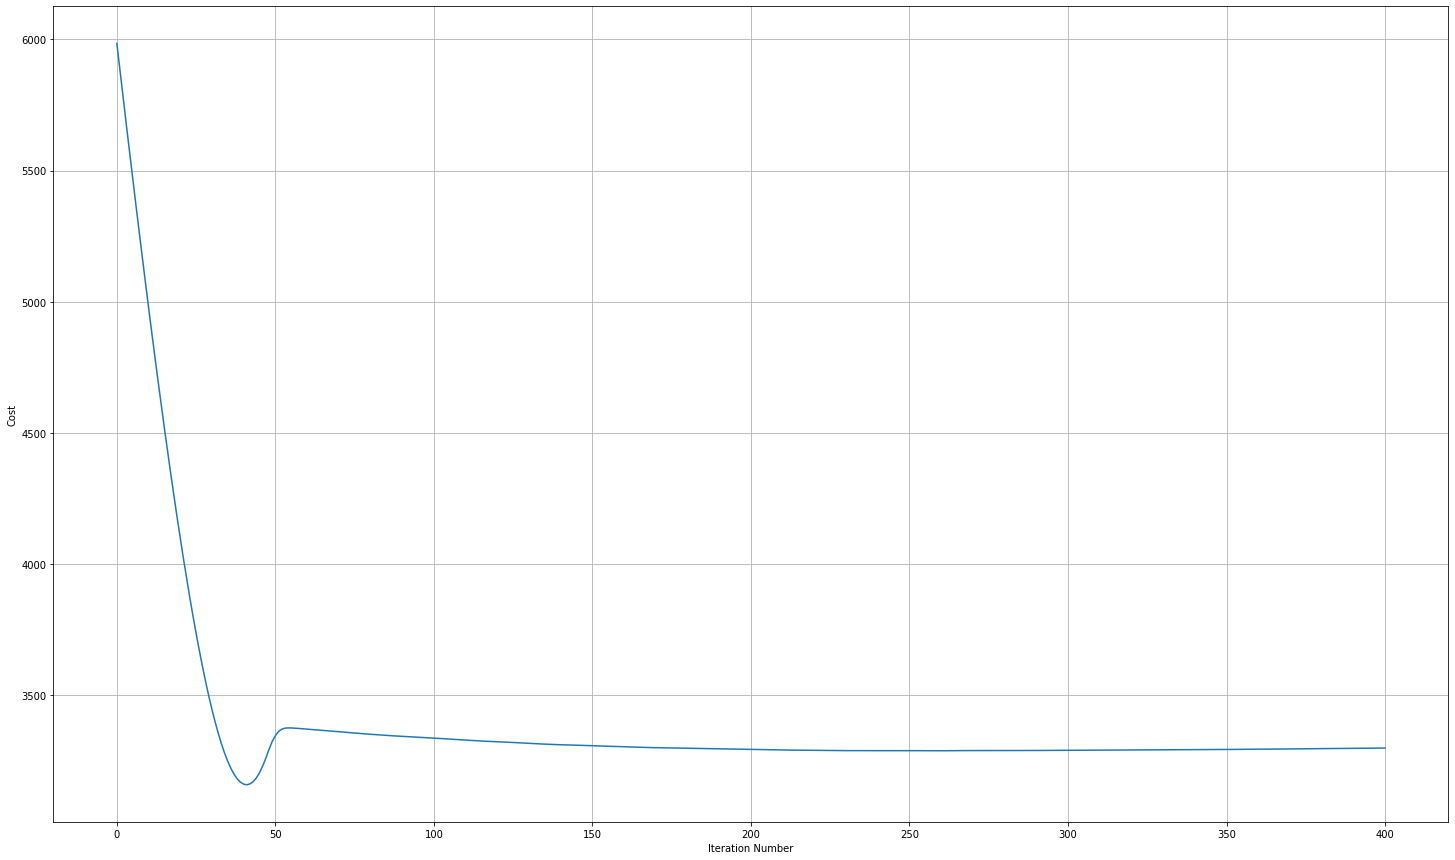

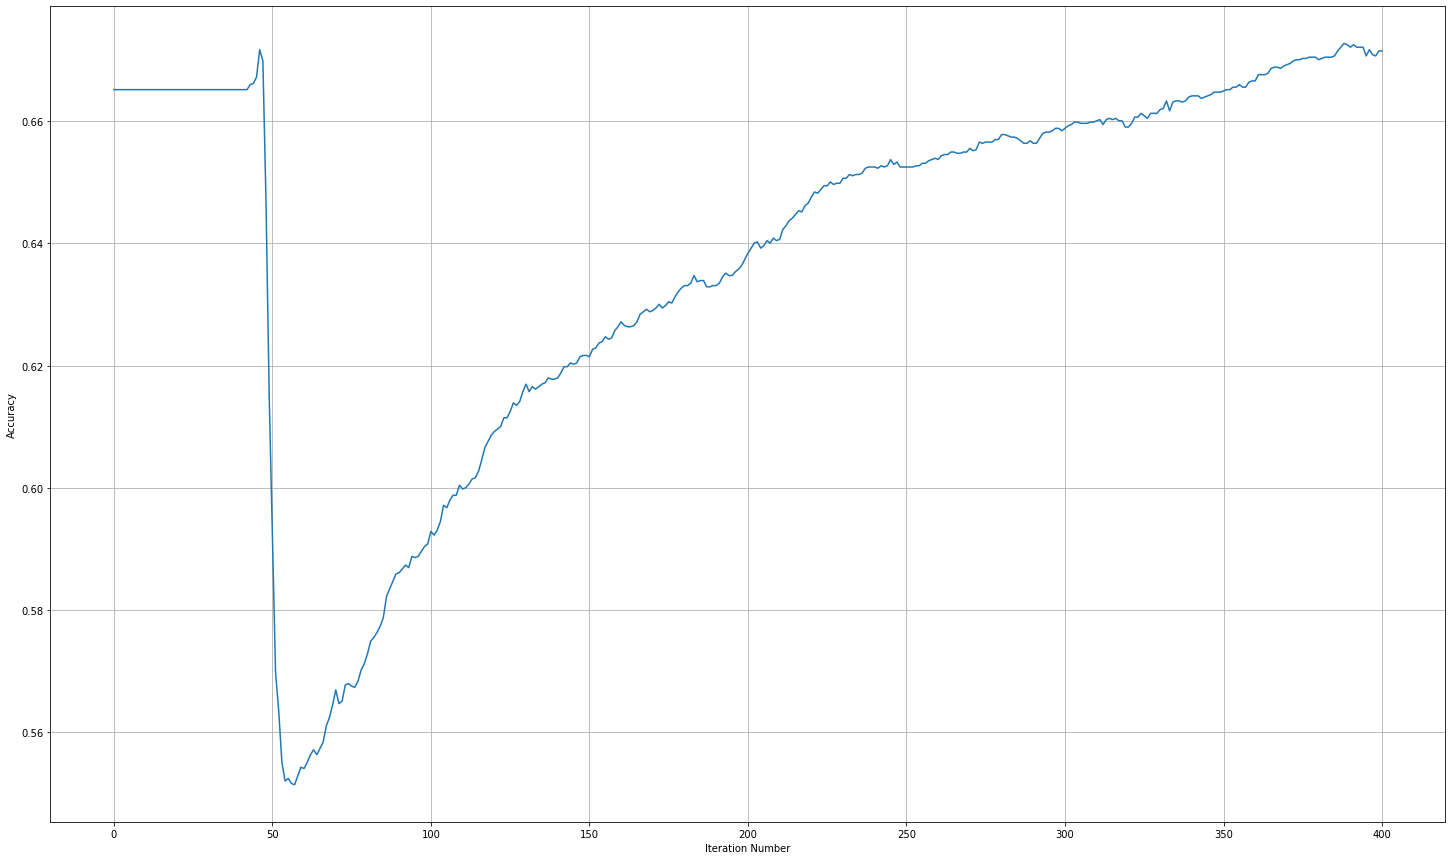

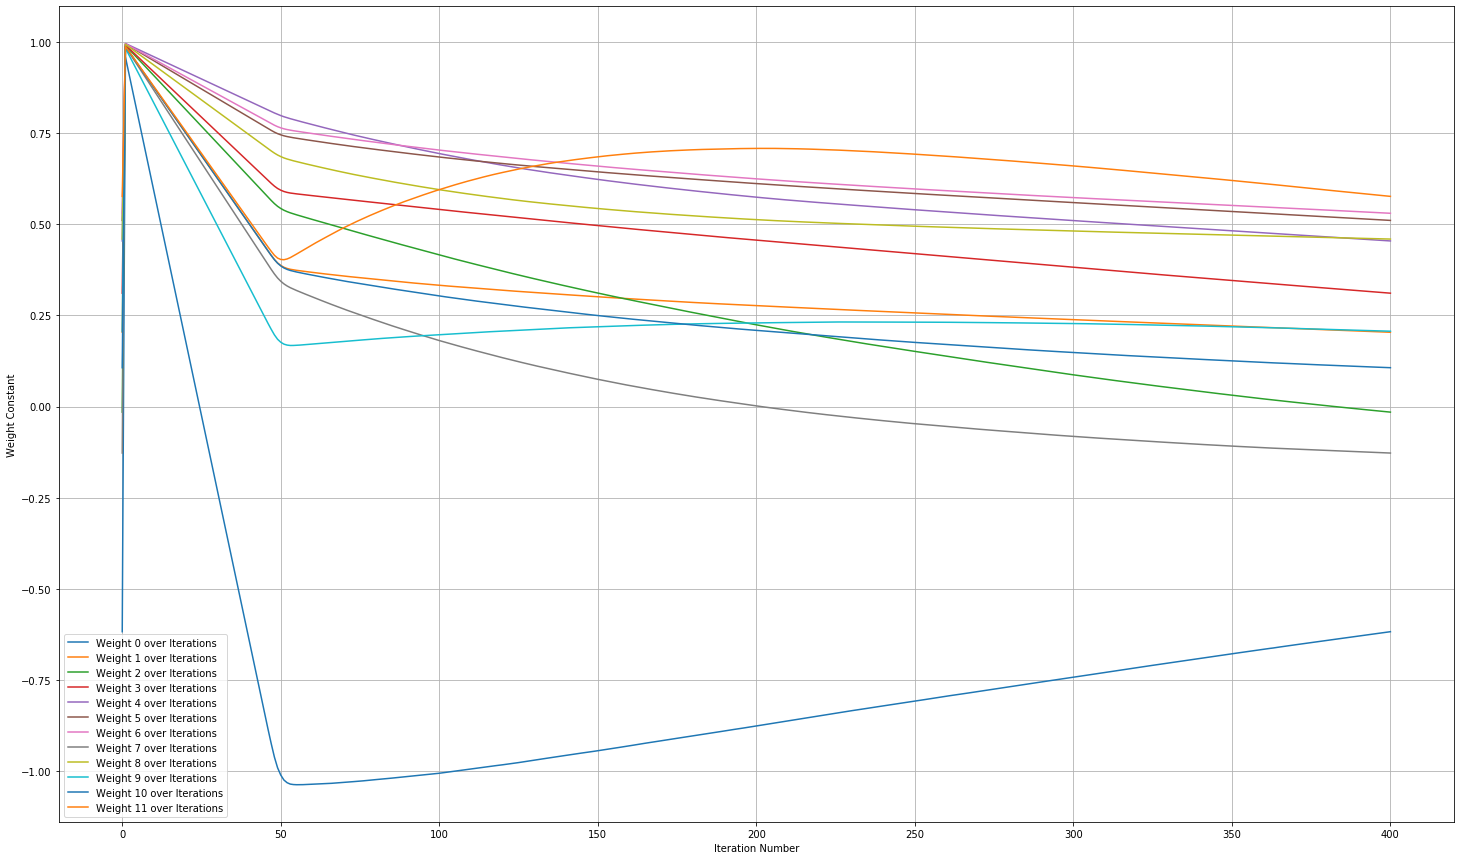

In [0]:
#Wine Logistic Regression Model
wine_LRM = LogisticRegressionModel( len(wineFeatures[0]) )
wine_history = wine_LRM.fit(wineFeatures,wineClassifications,LEARNING_RATE_WINES,GRADIENT_DESCENT_ITERATIONS_WINES,True)
print("Accuracy of wine_LRM  with LearningRate "+str(LEARNING_RATE_WINES)+" and GDIterations "+str(GRADIENT_DESCENT_ITERATIONS_WINES)+" : " + str(wine_LRM.evaluate_acc(wineFeatures,wineClassifications)))
graph_history(wine_history,True)

In [0]:
#LRM Cross Validation
wine_LRM = LogisticRegressionModel( len(wineFeatures[0]) )
kCVA_Results["wine_LRM"] = (">> K-Cross Validated Accuracy (K="+str(K)+") for wine_LRM with LearningRate "+str(LEARNING_RATE_WINES)+" and GDIterations "+str(GRADIENT_DESCENT_ITERATIONS_WINES)+" : " + str(kCrossValidate( K, wine_LRM, wineFeatures, wineClassifications, LEARNING_RATE_WINES, GRADIENT_DESCENT_ITERATIONS_WINES )) )
print(kCVA_Results["wine_LRM"])

Executing model fitting to fold number 1 of 5.
Executing gradient descent iteration number 10 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 20 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 30 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 40 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 50 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 60 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 70 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 80 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 90 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 100 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 110 of 400 with learning rate 2.5e-05.
Executing gradient descent iteration number 120 o

### Wine Dataset Testing - Gaussian Naive Bayes Model

In [0]:
#Wine Gaussian Naive Bayes Model
wine_GNBM = GaussianNaiveBayesModel( len(wineFeatures[0]), 2 )
kCVA_Results["wine_GNBM"] = (">> K-Cross Validated Accuracy (K="+str(K)+") for wine_GNBM : " + str(kCrossValidate( k=K, model=wine_GNBM, featuresDataset=wineFeatures, classificationsDataset=wineClassifications )) )
print(kCVA_Results["wine_GNBM"])

Executing model fitting to fold number 1 of 5.
Accuracy of fold number 0 is 0.686414708886619.
Executing model fitting to fold number 2 of 5.
Accuracy of fold number 1 is 0.6581632653061225.
Executing model fitting to fold number 3 of 5.
Accuracy of fold number 2 is 0.6894790602655771.
Executing model fitting to fold number 4 of 5.
Accuracy of fold number 3 is 0.713265306122449.
Executing model fitting to fold number 5 of 5.
Accuracy of fold number 4 is 0.7244897959183674.
>> K-Cross Validated Accuracy (K=5) for wine_GNBM with LearningRate 2.5e-05 and GDIterations 400 : 0.694362427299827


### Wine Dataset Testing - Hybrid Naive Bayes Model

In [0]:
#Wine Hybrid Naive Bayes Model
wine_HNBM = HybridNaiveBayesModel( len(wineFeatures[0]), 2 )
kCVA_Results["wine_HNBM"] = (">> K-Cross Validated Accuracy (K="+str(K)+") for wine_HNBM: " + str(kCrossValidate( k=K, model=wine_HNBM, featuresDataset=wineFeatures, classificationsDataset=wineClassifications )) )
print(kCVA_Results["wine_HNBM"])

Executing model fitting to fold number 1 of 5.
Accuracy of fold number 0 is 0.686414708886619.
Executing model fitting to fold number 2 of 5.
Accuracy of fold number 1 is 0.6571428571428571.
Executing model fitting to fold number 3 of 5.
Accuracy of fold number 2 is 0.6884576098059244.
Executing model fitting to fold number 4 of 5.
Accuracy of fold number 3 is 0.713265306122449.
Executing model fitting to fold number 5 of 5.
Accuracy of fold number 4 is 0.726530612244898.
>> K-Cross Validated Accuracy (K=5) for wine_HNBM: 0.6943622188405495


## ADULT DATASET IMPORT

In [0]:
import pandas as pd
import numpy as np

#==============================================================================================================
#
#   Data Importing
#
#==============================================================================================================

#Import Adult dataset.
adult_dataframe = pd.read_csv("/content/drive/My Drive/COMP551-W2020-Datasets/project1/preprocess_adult.csv",header=None)
#Clean and separate imported dataset into useful arrays
adultFeatures, adultClassifications = extractUsefulArrays(adult_dataframe)
#Binarize classifications
for i in range(len(adultClassifications)):
  if adultClassifications[i] == " >50K":
    adultClassifications[i] = 1
  else:
    adultClassifications[i] = 0

#Manual Import Checking
print(len(adultClassifications))
print(adultClassifications)
for i in range(5):
  print(adultFeatures[i])

30139
[0 0 0 ... 0 0 1]
[39 ' State-gov' 77516 ' Bachelors' 13 ' Never-married' ' Adm-clerical'
 ' Not-in-family' ' White' ' Male' 2174 0 40 ' United-States']
[50 ' Self-emp-not-inc' 83311 ' Bachelors' 13 ' Married-civ-spouse'
 ' Exec-managerial' ' Husband' ' White' ' Male' 0 0 13 ' United-States']
[38 ' Private' 215646 ' HS-grad' 9 ' Divorced' ' Handlers-cleaners'
 ' Not-in-family' ' White' ' Male' 0 0 40 ' United-States']
[53 ' Private' 234721 ' 11th' 7 ' Married-civ-spouse' ' Handlers-cleaners'
 ' Husband' ' Black' ' Male' 0 0 40 ' United-States']
[28 ' Private' 338409 ' Bachelors' 13 ' Married-civ-spouse'
 ' Prof-specialty' ' Wife' ' Black' ' Female' 0 0 40 ' Cuba']


### Adult Unchanged-Dataset Testing - Logistic Regression Model

Using the adult (raw) dataset to test my Logistic Regression, Gaussian Naive Bayes, and Hybrid Naive Bayes models

In [0]:
#Adult Logistic Regression Model
kCVA_Results["adult_LRM"] = (">> K-Cross Validated Accuracy (K="+str(K)+") for adult_LRM: Unable to conduct logistic regression on full adult dataset.")
print(kCVA_Results["adult_LRM"])

>> K-Cross Validated Accuracy (K=5) for adult_LRM: Unable to conduct logistic regression on full adult dataset.


### Adult Unchanged-Dataset Testing - Gaussian Naive Bayes Model

In [0]:
#Adult Gaussin Naive Bayes Model
kCVA_Results["adult_GNBM"] = (">> K-Cross Validated Accuracy (K="+str(K)+") for adult_GNBM: Unable to conduct Gaussian Naive Bayes fitting on full adult dataset.")
print(kCVA_Results["adult_GNBM"])

>> K-Cross Validated Accuracy (K=5) for adult_GNBM: Unable to conduct Gaussian Naive Bayes fitting on full adult dataset.


### Adult Unchanged-Dataset Testing - Hybrid Naive Bayes Model

In [0]:
#Adult Hybrid Naive Bayes Model
adult_HNBM = HybridNaiveBayesModel( len(adultFeatures[0]), 2 )
kCVA_Results["adult_HNBM"] = (">> K-Cross Validated Accuracy (K="+str(K)+") for adult_HNBM: " + str(kCrossValidate( k=K, model=adult_HNBM, featuresDataset=adultFeatures, classificationsDataset=adultClassifications )) )
print(kCVA_Results["adult_HNBM"])

Executing model fitting to fold number 1 of 5.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:250: RuntimeWarning: invalid value encountered in double_scalars


Accuracy of fold number 0 is 0.8083623693379791.
Executing model fitting to fold number 2 of 5.
Accuracy of fold number 1 is 0.8100530856005309.
Executing model fitting to fold number 3 of 5.
Accuracy of fold number 2 is 0.8120437956204379.
Executing model fitting to fold number 4 of 5.
Accuracy of fold number 3 is 0.8042468480424685.
Executing model fitting to fold number 5 of 5.
Accuracy of fold number 4 is 0.809721300597213.
>> K-Cross Validated Accuracy (K=5) for adult_HNBM: 0.808885479839726


## ADULT NUM-ONLY DATASET IMPORT

In [0]:
import pandas as pd
import numpy as np

#==============================================================================================================
#
#   Data Importing
#
#==============================================================================================================

#Make a numbers-only subset of the Adult dataset
adultNumeric_dataframe = adult_dataframe.copy(deep=True)
adultNumeric_non_numeric_columns = []
for column in range(len(adultNumeric_dataframe.keys())-1): #We ignore the classification column which gets pre-processed afterwards.
  for instance in adultNumeric_dataframe[column]:
    if (not (instance == " ?" or instance == "?" )) and isinstance(instance,float) == False and isinstance(instance,int) == False:
      adultNumeric_non_numeric_columns.append(column)
      break
adultNumeric_dataframe.drop(columns=adultNumeric_non_numeric_columns,inplace=True)
newnames = {} #There is no reset_index() for columns; you have to manually change the name of each column back to 0,1,2,3,etc.
newcolno = 0
for k in adultNumeric_dataframe.keys():
  newnames[k] = newcolno
  newcolno += 1
adultNumeric_dataframe.rename(columns=newnames, inplace=True) #Setting old kept indices to new ordered 0,1,... indices.
#Clean and separate imported dataset into useful arrays
adultNumericFeatures, adultNumericClassifications = extractUsefulArrays(adultNumeric_dataframe)
#Binarize classifications
for i in range(len(adultNumericClassifications)):
  if adultNumericClassifications[i] == " >50K":
    adultNumericClassifications[i] = 1
  else:
    adultNumericClassifications[i] = 0
#Turn the matrix back into being a floating point matrix
adultNumericFeatures = adultNumericFeatures.astype(np.float)
#Normalize all feature input columns added after consultation with Alexander Winter
for column in range( len(adultNumericFeatures[0]) ):
  vector = []
  for instance in range(len(adultNumericFeatures)):
    vector.append( adultNumericFeatures[instance][column] )
  vector = normalize_vector(vector)
  for instance in range(len(adultNumericFeatures)):
    adultNumericFeatures[instance][column] = vector[instance]

#Manual import checks
print(len(adultNumericClassifications))
print(adultNumericClassifications)
for i in range(5):
  print(adultNumericFeatures[i])

30139
[0 0 0 ... 0 0 1]
[0.30136986 0.04333771 0.8        0.02174022 0.         0.39795918]
[0.45205479 0.04727738 0.8        0.         0.         0.12244898]
[0.28767123 0.1372439  0.53333333 0.         0.         0.39795918]
[0.49315068 0.15021184 0.4        0.         0.         0.39795918]
[0.15068493 0.22070301 0.8        0.         0.         0.39795918]


### Adult Removed-Non-Numerics Dataset Testing - Logistic Regression Model

Using the adult (numbers only) dataset to test my Logistic Regression, Gaussian Naive Bayes, and Hybrid Naive Bayes models

Executing gradient descent iteration number 10 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 20 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 30 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 40 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 50 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 60 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 70 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 80 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 90 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 100 of 100 with learning rate 5e-06.
Accuracy of adultNumeric_LRM: 0.76014466306115
Creating Weights Over Iteration Figure


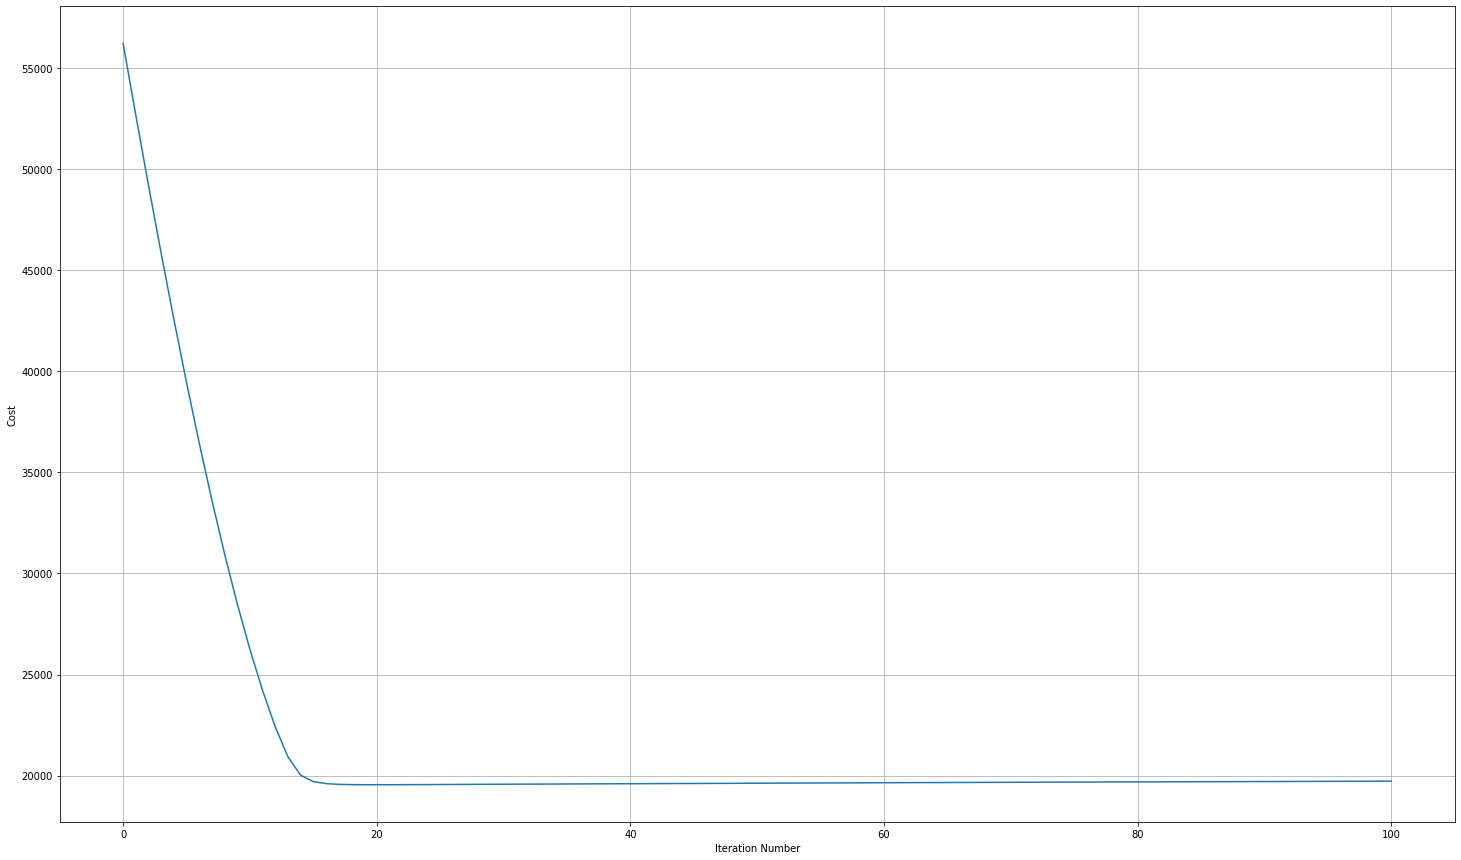

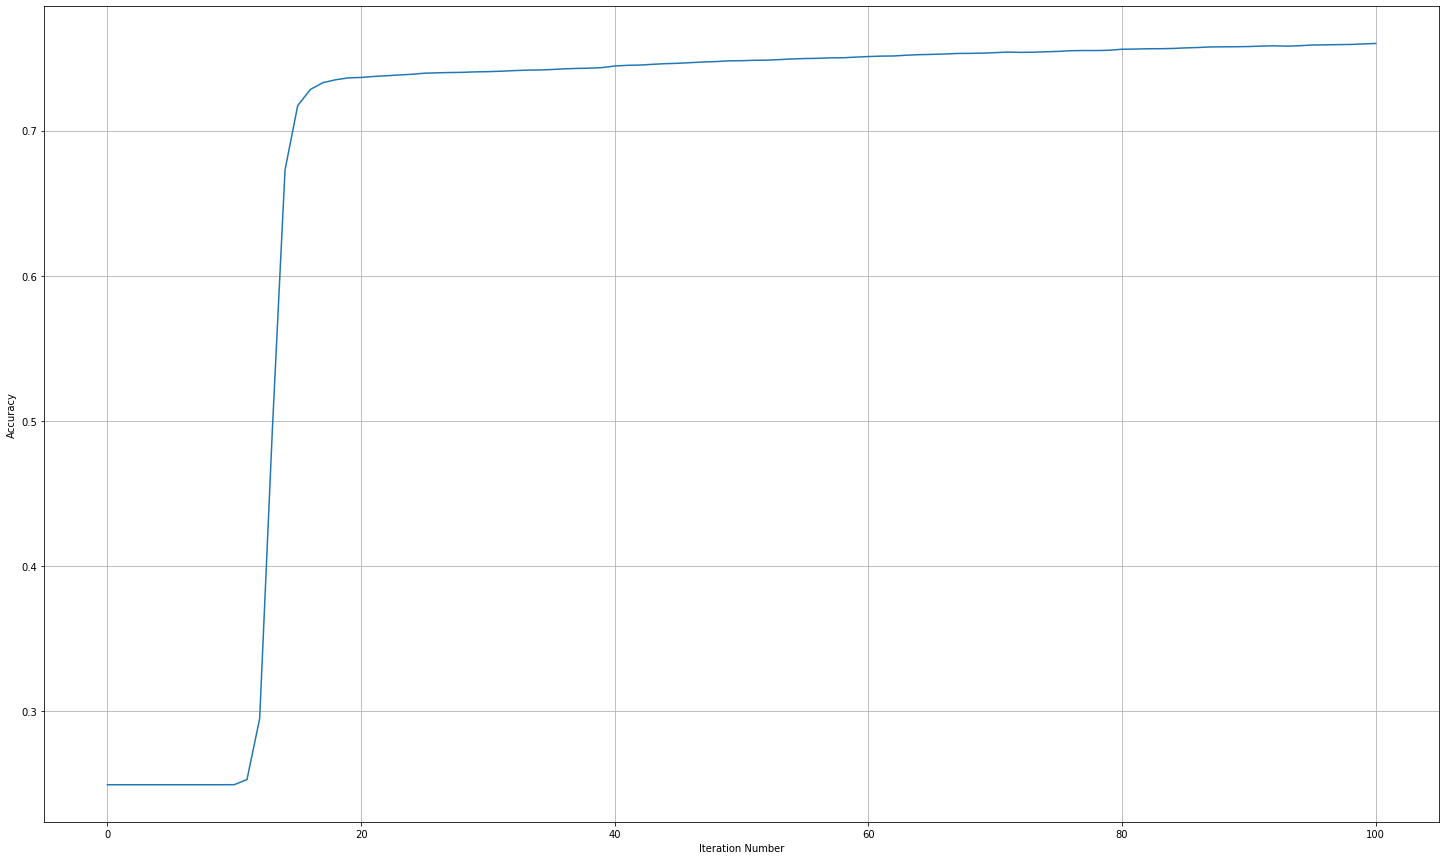

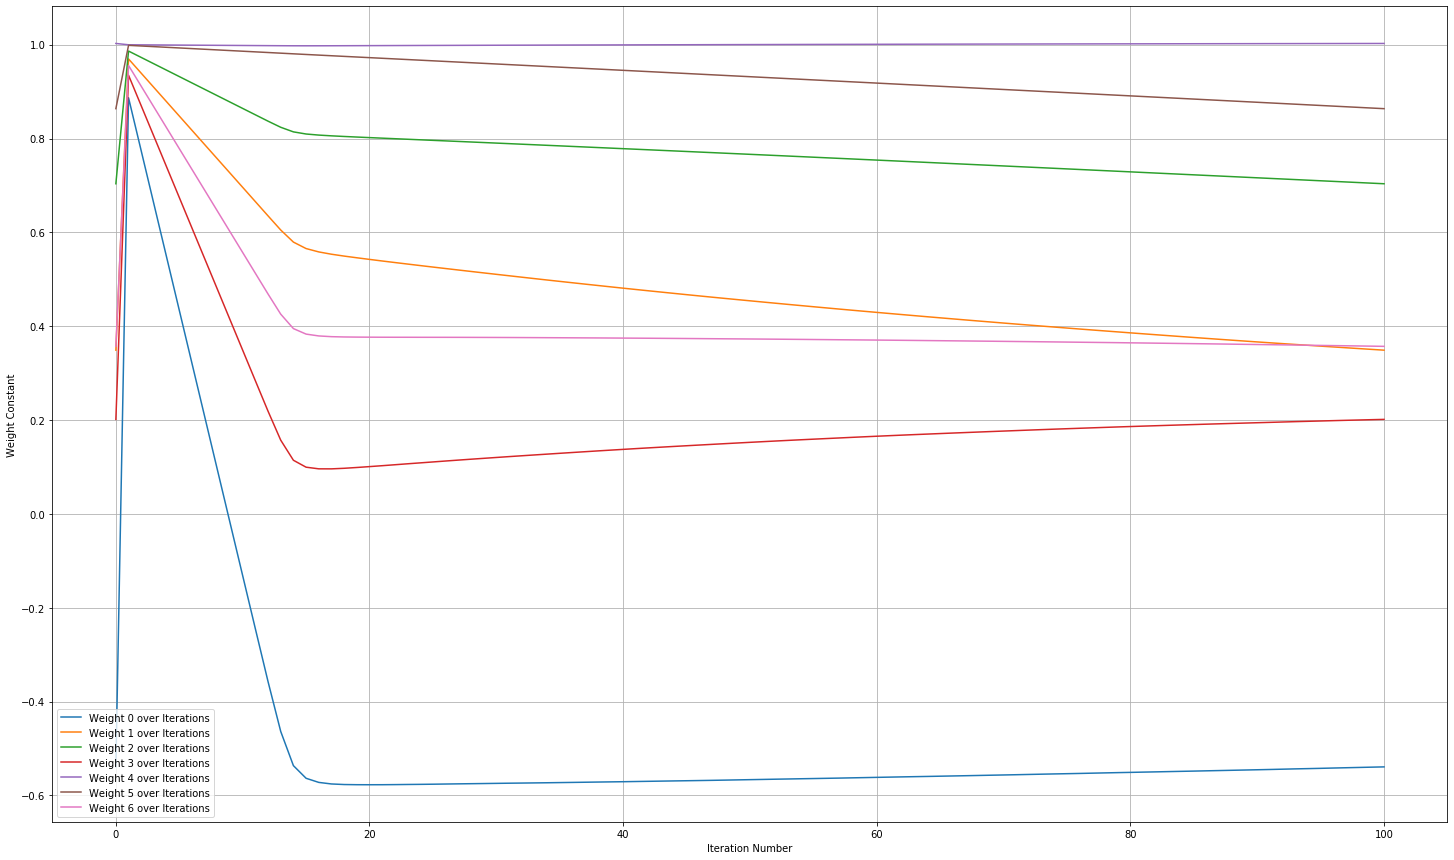

In [0]:
#Adult Numbers-only Logistic Regression Model
adultNumeric_LRM = LogisticRegressionModel( len(adultNumericFeatures[0]) )
adultNumeric_history = adultNumeric_LRM.fit(adultNumericFeatures,adultNumericClassifications,LEARNING_RATE_ADULT,GRADIENT_DESCENT_ITERATIONS_ADULT,True)
print("Accuracy of adultNumeric_LRM: " + str(adultNumeric_LRM.evaluate_acc(adultNumericFeatures,adultNumericClassifications)) )
graph_history(adultNumeric_history,True)

In [0]:
#LRM K-Cross Validation
adultNumeric_LRM = LogisticRegressionModel( len(adultNumericFeatures[0]) )
kCVA_Results["adultNumeric_LRM"] = (">> K-Cross Validated Accuracy (K="+str(K)+") for adultNumeric_LRM with LearningRate "+str(LEARNING_RATE)+" and GDIterations "+str(GRADIENT_DESCENT_ITERATIONS)+" : " + str(kCrossValidate( k=K, model=adultNumeric_LRM, featuresDataset=adultNumericFeatures, classificationsDataset=adultNumericClassifications, learningRate=LEARNING_RATE_ADULT, gradientDescentIterations=GRADIENT_DESCENT_ITERATIONS_ADULT )) )
print(kCVA_Results["adultNumeric_LRM"])

Executing model fitting to fold number 1 of 5.
Executing gradient descent iteration number 10 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 20 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 30 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 40 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 50 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 60 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 70 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 80 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 90 of 100 with learning rate 5e-06.
Executing gradient descent iteration number 100 of 100 with learning rate 5e-06.
Accuracy of fold number 0 is 0.7471378795420607.
Executing model fitting to fold number 2 of 5.
Executing gradient descent iteration number 10 of 100 wi

### Adult Removed-Non-Numerics Dataset Testing - Gaussian Naive Bayes Model

In [0]:
#Adult Numbers-only Gaussian Naive Bayes Model
adultNumeric_GNBM = GaussianNaiveBayesModel( len(adultNumericFeatures[0]), 2 )
print(adultNumericFeatures)
string = ""
for i in adultNumericClassifications:
  string = string + str(i)
print(string)
kCVA_Results["adultNumeric_GNBM"] = (">> K-Cross Validated Accuracy (K="+str(K)+") for adultNumeric_GNBM: " + str(kCrossValidate( k=K, model=adultNumeric_GNBM, featuresDataset=adultNumericFeatures, classificationsDataset=adultNumericClassifications )) )
print(kCVA_Results["adultNumeric_GNBM"])

[[0.30136986 0.04333771 0.8        0.02174022 0.         0.39795918]
 [0.45205479 0.04727738 0.8        0.         0.         0.12244898]
 [0.28767123 0.1372439  0.53333333 0.         0.         0.39795918]
 ...
 [0.56164384 0.09391367 0.53333333 0.         0.         0.39795918]
 [0.06849315 0.1276201  0.53333333 0.         0.         0.19387755]
 [0.47945205 0.18638336 0.53333333 0.1502415  0.         0.39795918]]
0000000111110000001100001000000000000000001000001101000000100011001000000000010100100010110011000100001100001000001010100000010001000100000000000000000100000001010000010011000100000001100100010100100110000000000000000100110100010110000100000000011011000001001010001100000000000010110000110110000000000001000000000000011000001010101000101000010001000000000000001001000001100100100000010100000010000010010100000001000000111100000000000111000000000000000100000000000000000000010011101101000000110000000000000000001000001101000000001010001000000101100100000000100000000000010000001011

### Adult Removed-Non-Numerics Dataset Testing - Hybrid Naive Bayes Model

In [0]:
#Adult Numbers-only Hybrid Naive Bayes Model
adultNumeric_HNBM = HybridNaiveBayesModel( len(adultNumericFeatures[0]), 2 )
kCVA_Results["adultNumeric_HNBM"] = (">> K-Cross Validated Accuracy (K="+str(K)+") for adultNumeric_HNBM: " + str(kCrossValidate( k=K, model=adultNumeric_HNBM, featuresDataset=adultNumericFeatures, classificationsDataset=adultNumericClassifications )) )
print(kCVA_Results["adultNumeric_HNBM"])

Executing model fitting to fold number 1 of 5.
Accuracy of fold number 0 is 0.7876223660195786.
Executing model fitting to fold number 2 of 5.
Accuracy of fold number 1 is 0.7884870603848706.
Executing model fitting to fold number 3 of 5.
Accuracy of fold number 2 is 0.794127405441274.
Executing model fitting to fold number 4 of 5.
Accuracy of fold number 3 is 0.7850033178500332.
Executing model fitting to fold number 5 of 5.
Accuracy of fold number 4 is 0.7909754479097545.
>> K-Cross Validated Accuracy (K=5) for adultNumeric_HNBM: 0.7892431195211022


## Recap of Other-Three Dataset Tests

Reprinting all results

In [0]:
print("#==============================================================================================================")
print("#")
print("#   RECAPPING OTHER DATASET RESULTS")
print("#")
print("#==============================================================================================================")
print("To recap the k-Cross Validation Results (k=10) for the three non-ionosphere datasets:")
for k in kCVA_Results:
  print(kCVA_Results[k])


#==============================================================================================================
#
#   RECAPPING OTHER DATASET RESULTS
#
#==============================================================================================================
To recap the k-Cross Validation Results (k=10) for the three non-ionosphere datasets:
>> K-Cross Validated Accuracy (K=5) for adultNumeric_LRM with LearningRate 5e-05 and GDIterations 200 : 0.7562623469767599
>> K-Cross Validated Accuracy (K=5) for adultNumeric_GNBM: 0.7893426550220976
>> K-Cross Validated Accuracy (K=5) for adultNumeric_HNBM: 0.7892431195211022
>> K-Cross Validated Accuracy (K=5) for adult_LRM: Unable to conduct logistic regression on full adult dataset.
>> K-Cross Validated Accuracy (K=5) for adult_GNBM: Unable to conduct Gaussian Naive Bayes fitting on full adult dataset.
>> K-Cross Validated Accuracy (K=5) for adult_HNBM: 0.808885479839726
>> K-Cross Validated Accuracy (K=5) for wine_LRM: 0.654735360947238

# RECORD OF RESULTS

2020 February the 10th 1:13 AM


   RECAPPING OTHER DATASET RESULTS

**NON-NORMALIZED DATASETS:**

K-Cross Validated Accuracy (K=5) for ionosphere_LRM with LearningRate 0.0004 and GDIterations 250 : 0.78897384305835

K-Cross Validated Accuracy (K=5) for ionosphere_GNBM: 0.8290598290598291

K-Cross Validated Accuracy (K=5) for ionosphere_HNBM: 0.8376068376068376


**NORMALIZED DATASETS:**

K-Cross Validated Accuracy (K=5) for adultNumeric_LRM with LearningRate 5e-05 and GDIterations 200 : 0.7562623469767599

K-Cross Validated Accuracy (K=5) for adultNumeric_GNBM: 0.7893426550220976

K-Cross Validated Accuracy (K=5) for adultNumeric_HNBM: 0.7892431195211022

K-Cross Validated Accuracy (K=5) for adult_LRM: Unable to conduct logistic regression on full adult dataset.

K-Cross Validated Accuracy (K=5) for adult_GNBM: Unable to conduct Gaussian Naive Bayes fitting on full adult dataset.

K-Cross Validated Accuracy (K=5) for adult_HNBM: 0.808885479839726

K-Cross Validated Accuracy (K=5) for wine_LRM with LearningRate 2.5e-05 and GDIterations 400 : 0.6547353609472389

K-Cross Validated Accuracy (K=5) for wine_GNBM : 0.694362427299827

K-Cross Validated Accuracy (K=5) for wine_HNBM: 0.6943622188405495

K-Cross Validated Accuracy (K=5) for cancer_LRM with LearningRate 5e-05 and GDIterations 200 : 0.9267389437526836

K-Cross Validated Accuracy (K=5) for cancer_GNBM: 0.9619257191927867

K-Cross Validated Accuracy (K=5) for cancer_HNBM: 0.9604658651781881
